# Proyecto Final - Grupo #1
## Integrantes
- Darlyn Bravo Peña
- Joel Gabriel Torrejon
- Giovani Vega
- Brandon Jason Valle Tamayo

## Libs to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score

## Carga de Dataset

In [2]:
group_1_df = pd.read_csv('files/GRUPO 1_1.csv', delimiter = "|")

## Generalidades del Dataset

In [3]:
group_1_df.head()

,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
0,0.000011,279403833,NO,0.00000,0.000000,0.0,11.991000,0.253845,0.000000,0.000000,...,0.000000,0.026359,0.282127,0.000000,0.0,0.0,0.000000,0.507707,0.0,0.000577
1,0.000021,278970977,NO,0.02043,6.621791,0.0,1.545208,116.968217,19.232067,0.000000,...,0.000007,0.201098,0.016155,0.000014,0.0,0.0,0.000000,0.741277,0.0,0.000690
2,0.000034,266714141,NO,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.117024,0.696280,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000036,278047301,NO,0.00000,0.039873,0.0,0.225174,84.001848,0.104324,0.000000,...,0.000028,0.090584,0.042693,0.000000,0.0,0.0,0.000000,0.706128,0.0,0.004855
4,0.000045,334324292,NO,0.00000,5.223464,0.0,131.933357,130.280795,3.020154,0.044157,...,0.000180,0.257948,0.134969,0.000003,0.0,0.0,0.000965,0.397722,0.0,0.017215


In [4]:
working_columns = group_1_df.columns[:33]
group_1_df = group_1_df[working_columns]
group_1_df.head()

,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0.000011,279403833,NO,0.00000,0.000000,0.0,11.991000,0.253845,0.000000,0.000000,...,7.644041,0.000000,33.253913,355.920100,0.000000,0.0,0.0,0.000000,640.502304,0.0
1,0.000021,278970977,NO,0.02043,6.621791,0.0,1.545208,116.968217,19.232067,0.000000,...,177.410416,0.464984,13272.544194,1066.254358,0.928695,0.0,0.0,0.000000,48924.609899,0.0
2,0.000034,266714141,NO,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000519,0.003088,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.000036,278047301,NO,0.00000,0.039873,0.0,0.225174,84.001848,0.104324,0.000000,...,80.590325,0.115759,378.962361,178.606595,0.000000,0.0,0.0,0.000000,2954.117570,0.0
4,0.000045,334324292,NO,0.00000,5.223464,0.0,131.933357,130.280795,3.020154,0.044157,...,83.448735,1.447770,2079.625774,1088.149231,0.025015,0.0,0.0,7.781566,3206.512316,0.0


In [5]:
# missing values
missing_values = group_1_df.isnull().sum()
duplicates = group_1_df.duplicated().sum()
print('Missing values', missing_values)
print('Duplicated Values', duplicates)

Missing values ALEAT    0
ID       0
OBJ      0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
dtype: int64
Duplicated Values 0


In [6]:
group_1_df.shape

(10000, 33)

In [7]:
group_1_df.dtypes

ALEAT    float64
ID         int64
OBJ       object
V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
V29      float64
V30      float64
dtype: object

In [8]:
group_1_df.describe()

,ALEAT,ID,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.029344,2.816031e+08,261.039200,124.314067,0.953652,169.008322,281.740473,3.211213,1.618930,0.011950,...,209.975400,18.103871,3441.336091,1562.573547,10.384319,0.511318,9.377279,1.688439,9960.252040,6.488413
std,0.017098,3.414150e+08,1058.929785,786.846001,28.051622,979.155195,1189.587221,8.988382,18.507076,0.183108,...,791.828675,128.522607,7896.907228,3586.423106,110.448810,6.568766,624.332156,9.399634,19976.762047,245.461237
min,0.000011,2.158800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014511,2.659602e+08,0.000000,0.000000,0.000000,0.335424,5.548826,0.046440,0.000000,0.000000,...,10.597058,0.000000,57.999321,168.175352,0.000000,0.000000,0.000000,0.000000,627.202158,0.000000
50%,0.029280,2.735794e+08,0.000000,0.295540,0.000000,6.189753,31.308841,0.480831,0.000000,0.000000,...,44.585142,0.304189,383.553319,599.064787,0.012030,0.000000,0.000000,0.000000,2639.754585,0.000000
75%,0.044246,2.788863e+08,15.531321,13.766102,0.000000,51.979846,149.541211,2.512911,0.000000,0.000000,...,162.041389,3.662268,2550.391607,1644.525635,0.252591,0.000000,0.000000,0.000000,9055.486017,0.000000
max,0.058759,5.080900e+09,25628.988899,32962.461093,2228.616420,62724.729745,55157.305829,279.450335,694.292589,9.814952,...,49167.459499,7986.945888,176673.900078,199808.805101,6306.175168,413.849357,59128.115880,222.872718,523688.791357,18197.115980


## Exploratory Data Analysis - Univariado

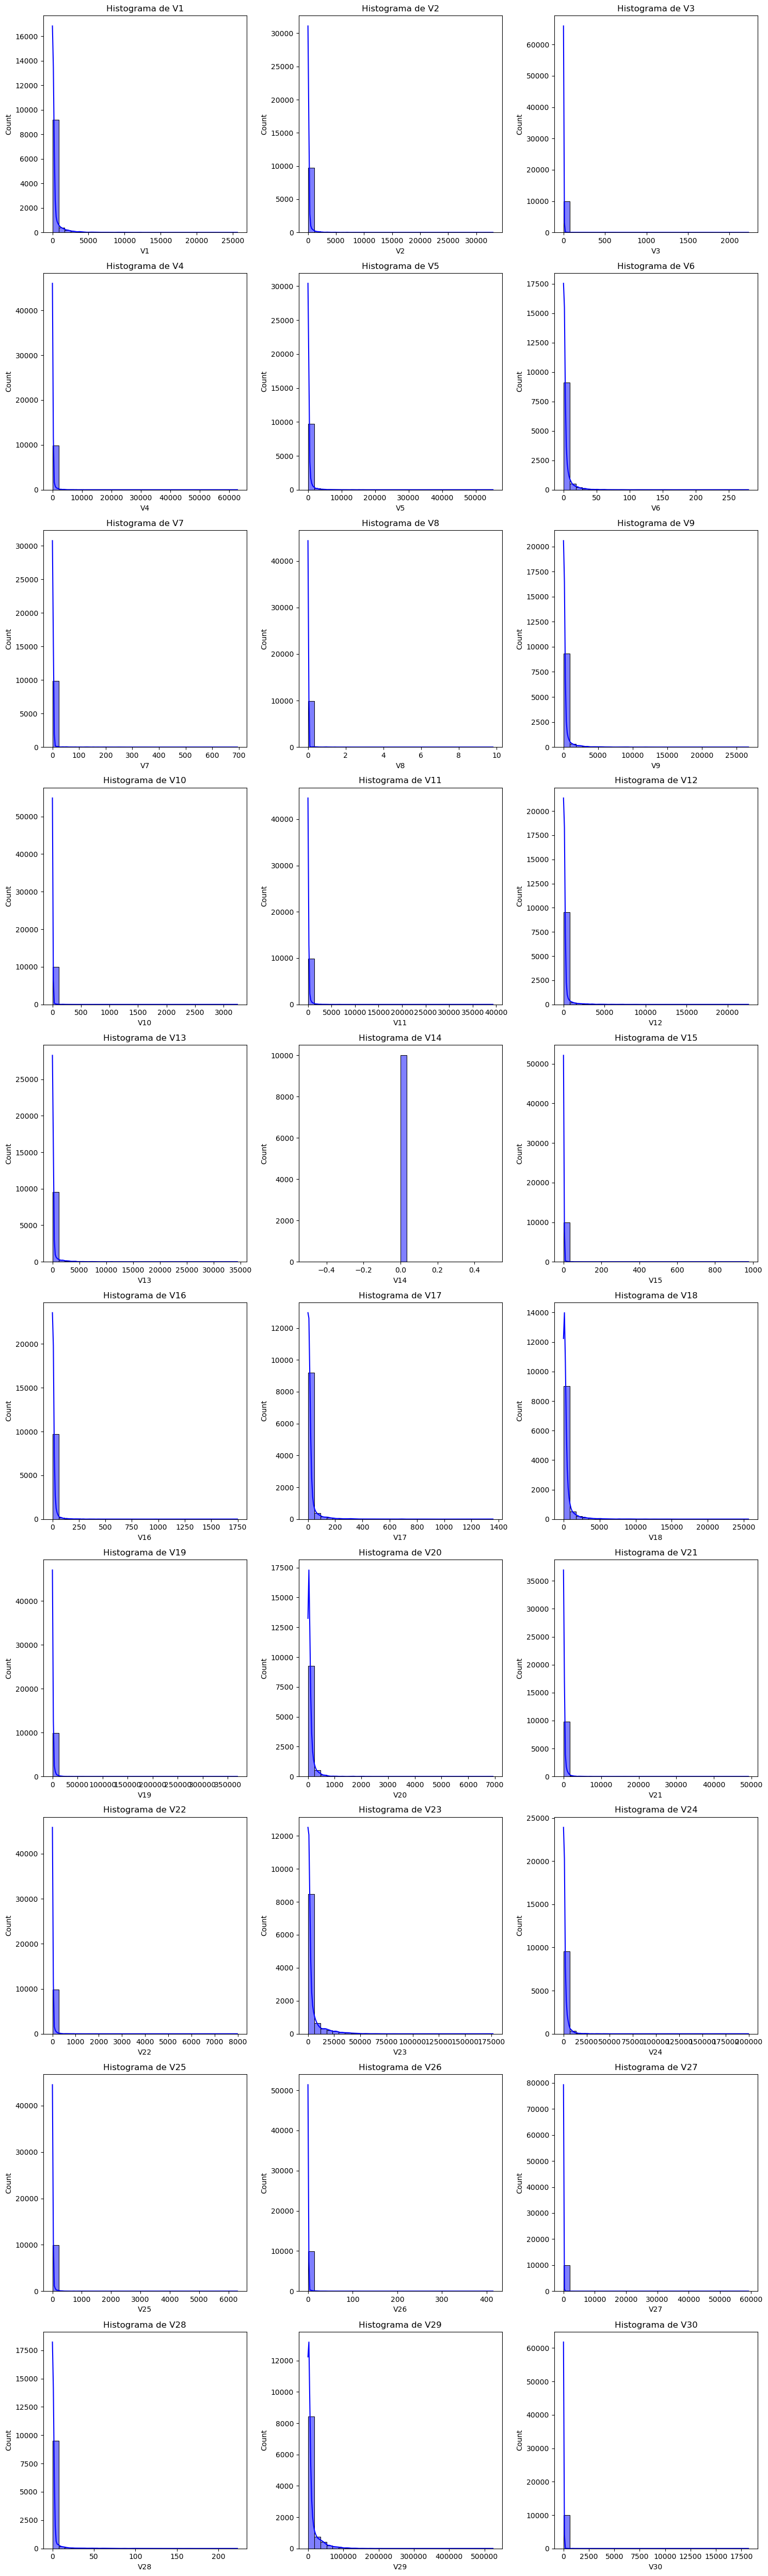

In [64]:
# Histogramas
working_columns = [f"V{i+1}" for i in range(30)]
df_numeric = group_1_df.select_dtypes(include=['number'])[working_columns]

# Número de columnas
num_cols = len(df_numeric.columns)

fig, axes = plt.subplots(nrows=int(np.ceil(num_cols/3)), ncols=3, figsize=(15, 5*num_cols//3))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], kde=True, bins=30, color="blue", ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")

# Ajustar diseño
plt.tight_layout()
plt.show()

### BoxPlot

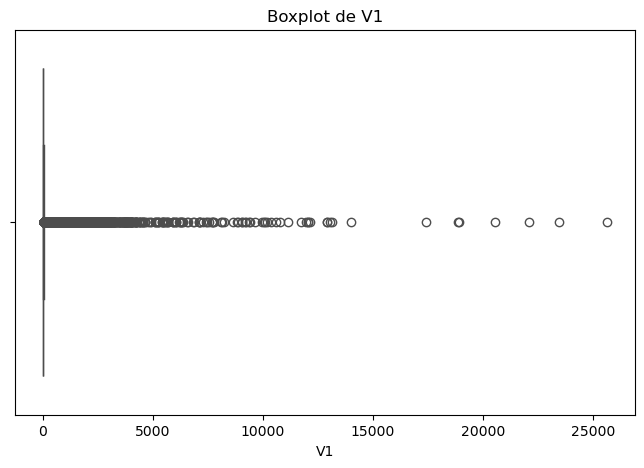

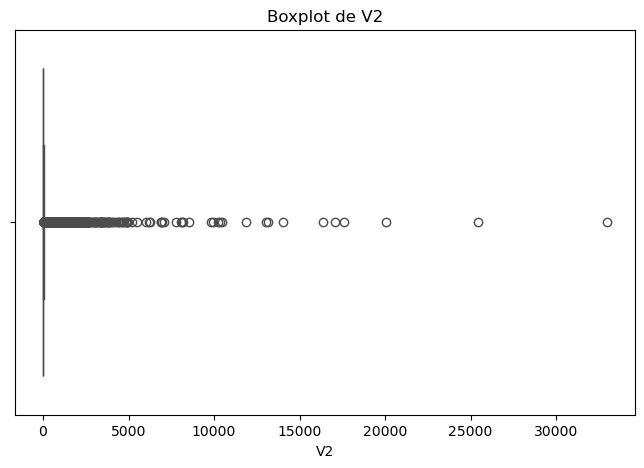

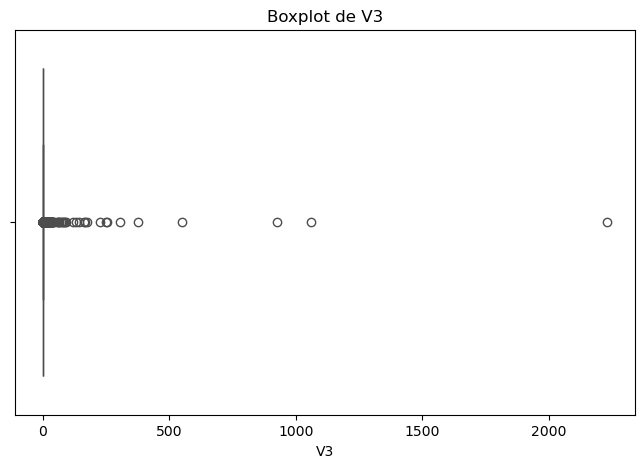

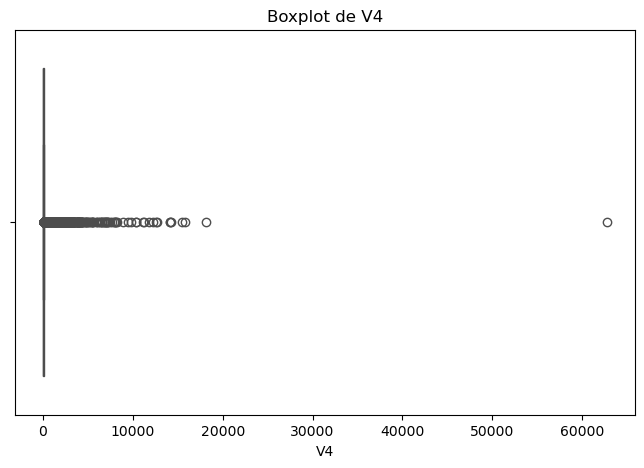

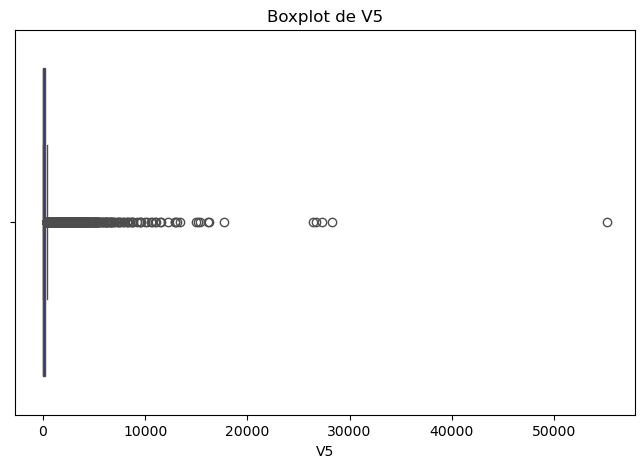

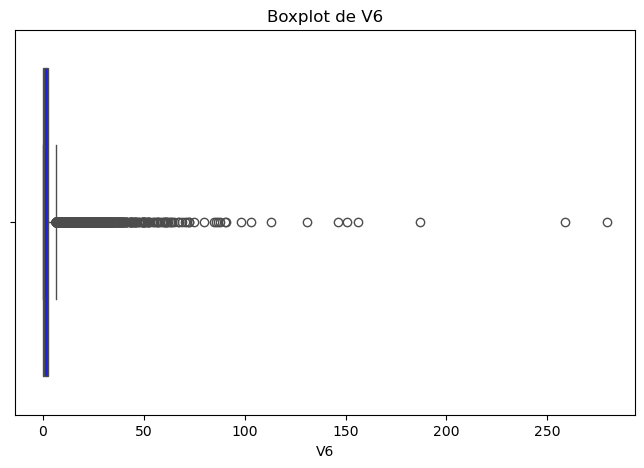

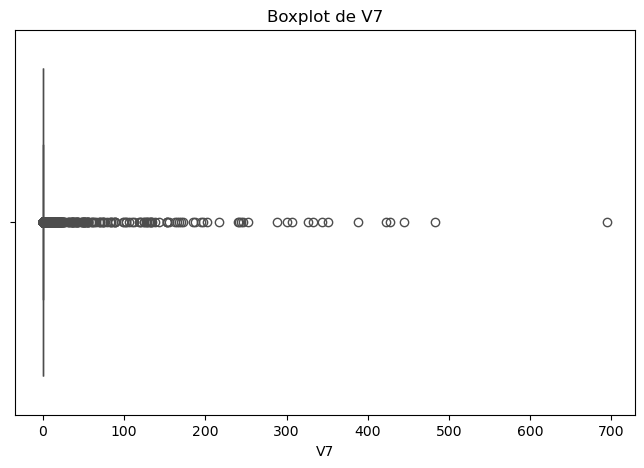

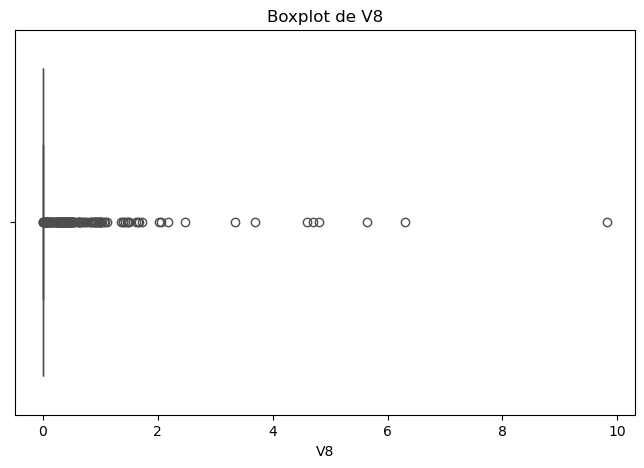

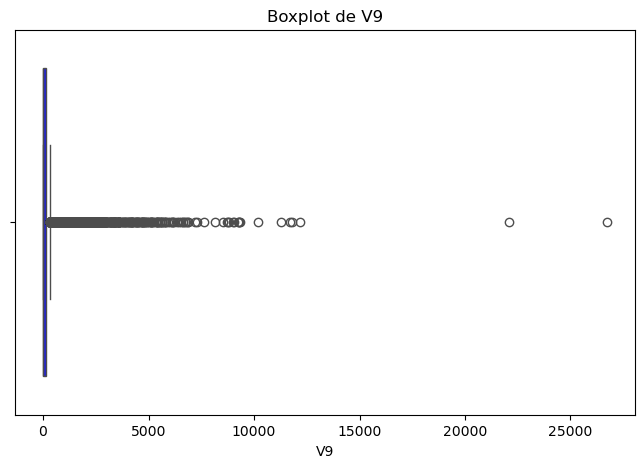

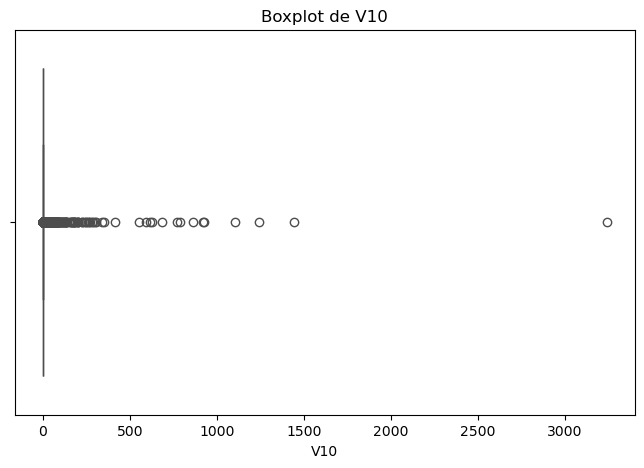

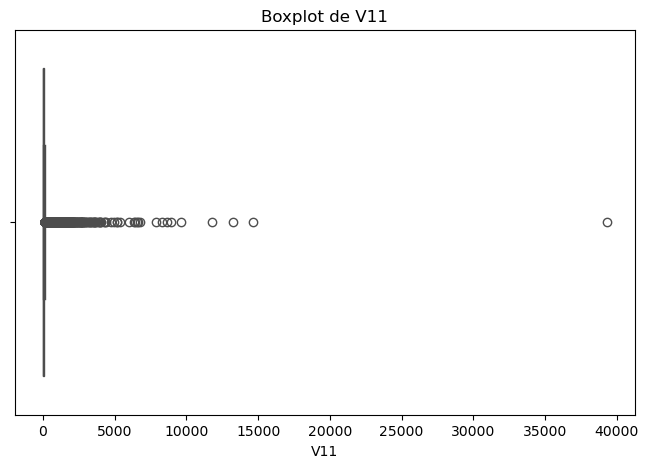

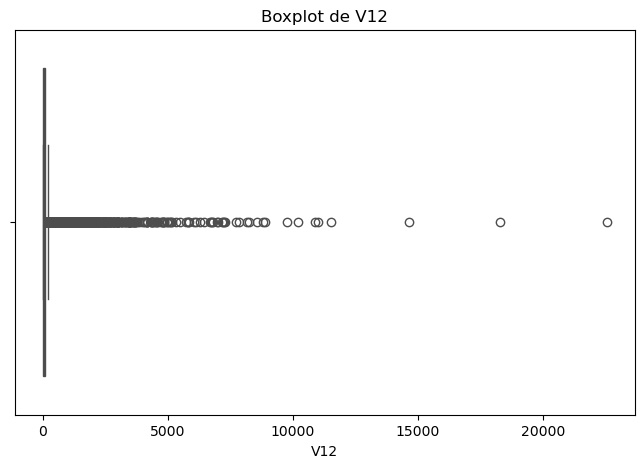

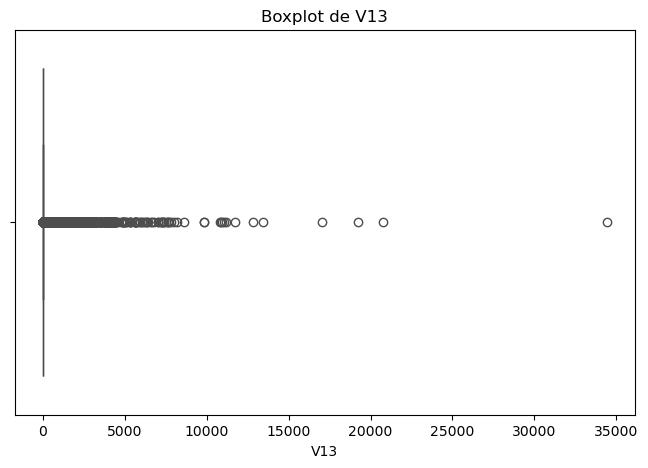

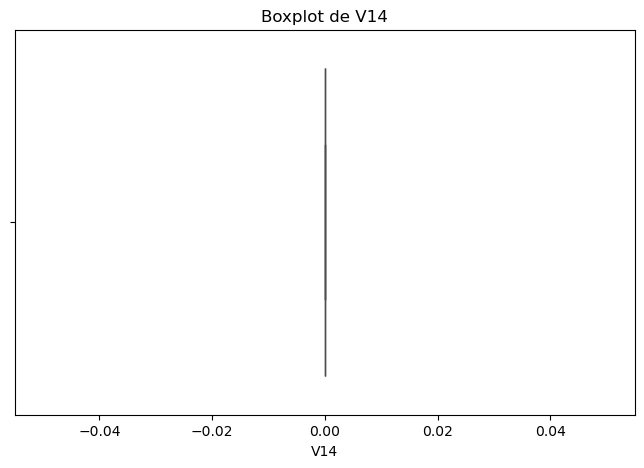

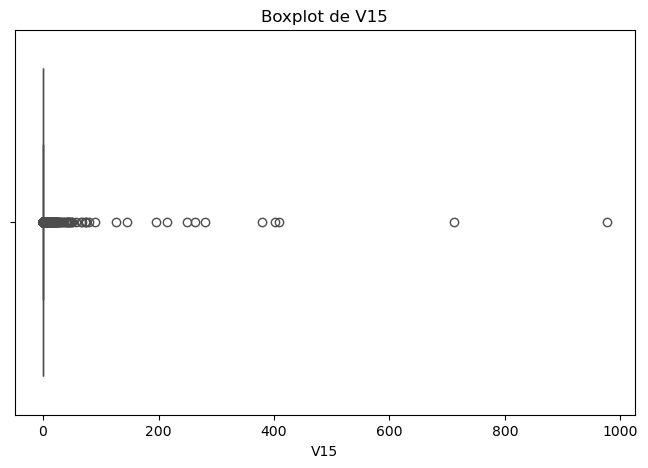

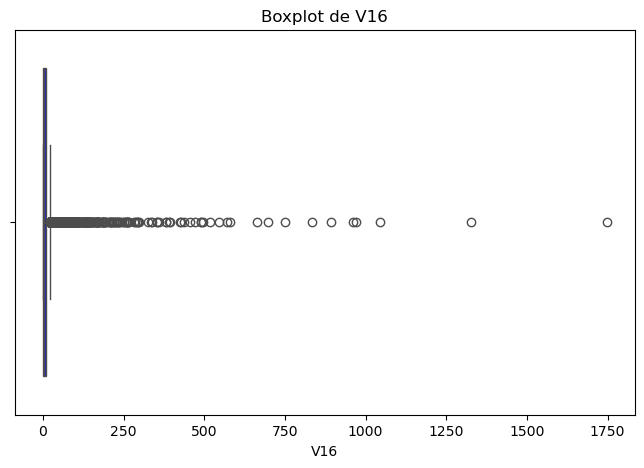

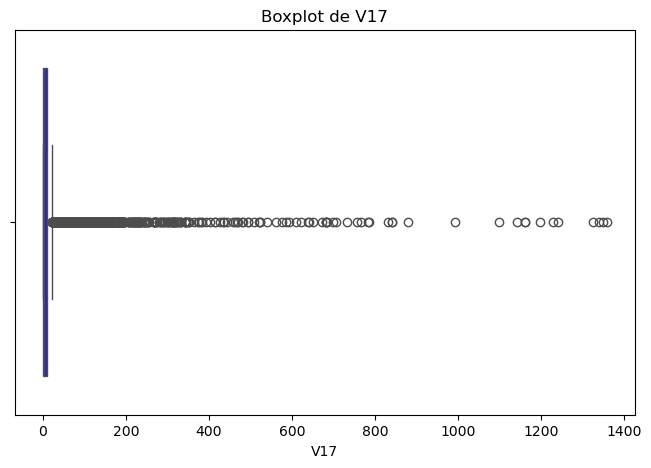

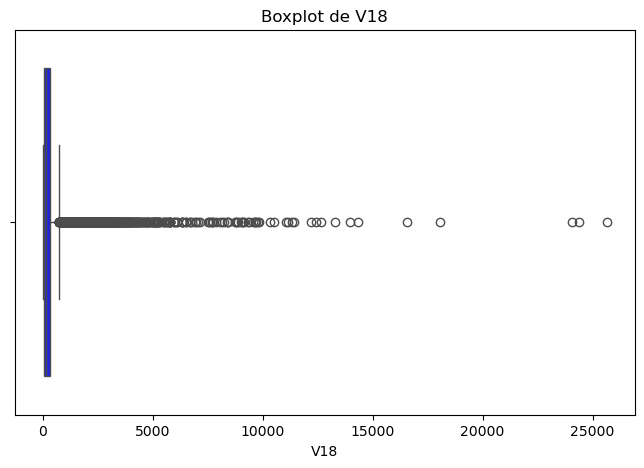

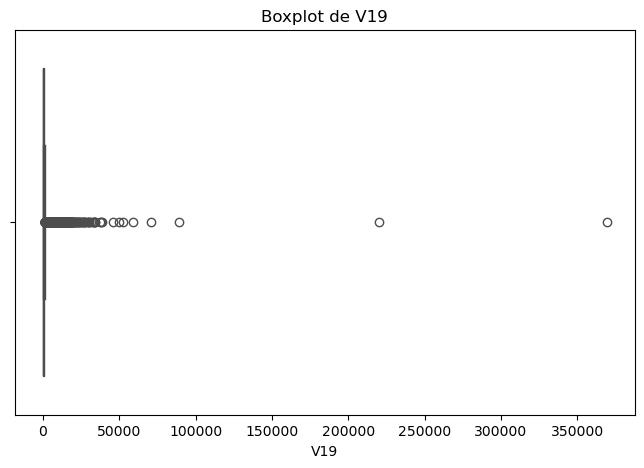

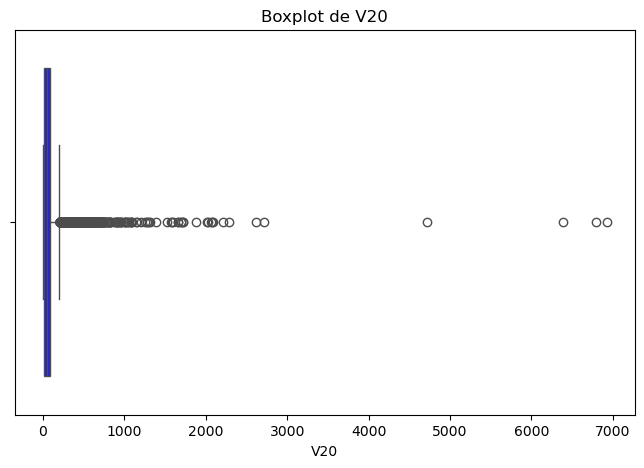

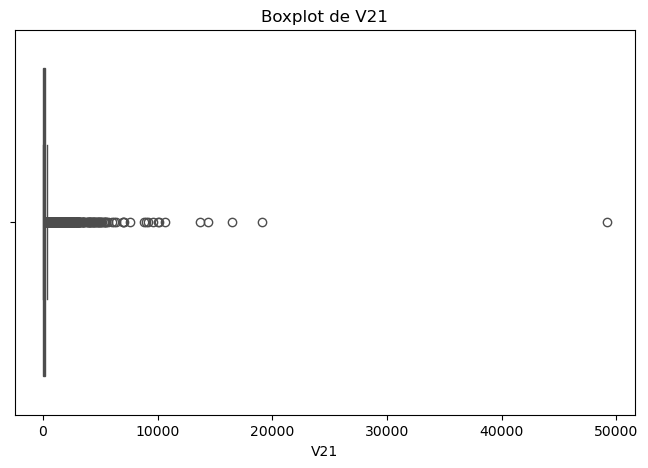

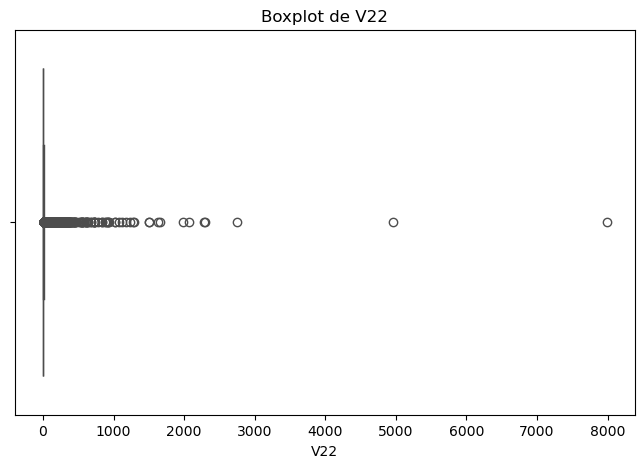

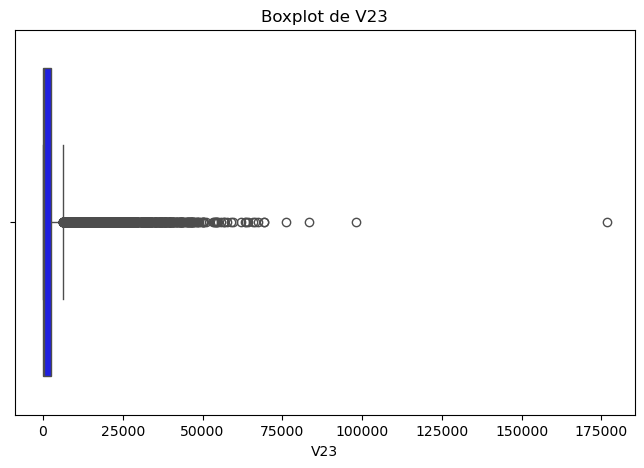

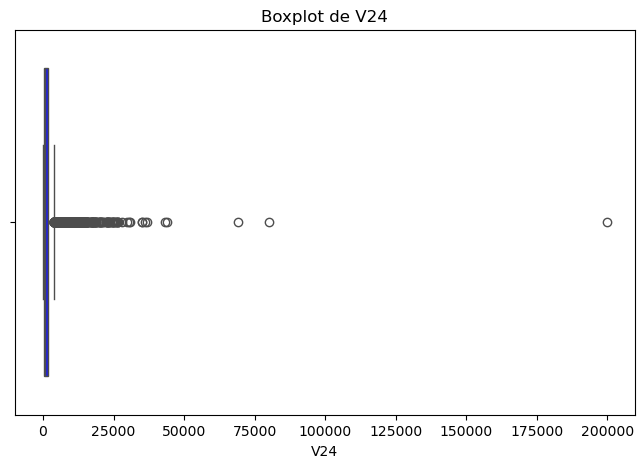

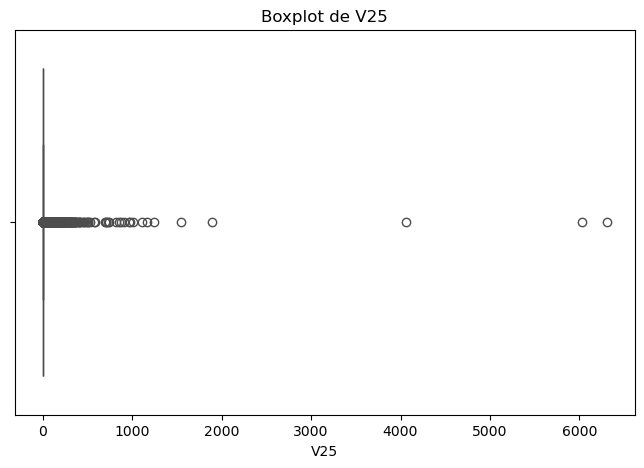

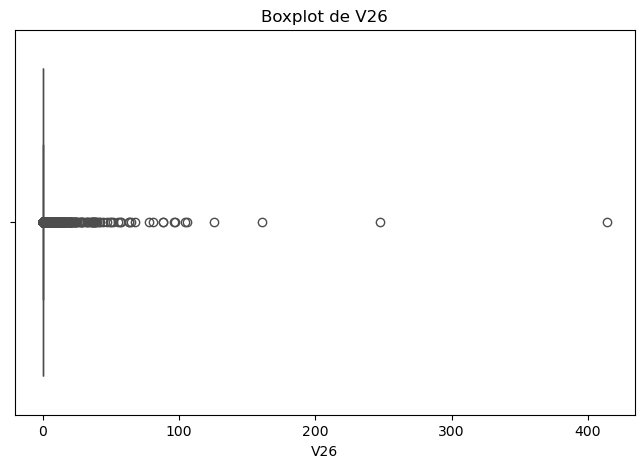

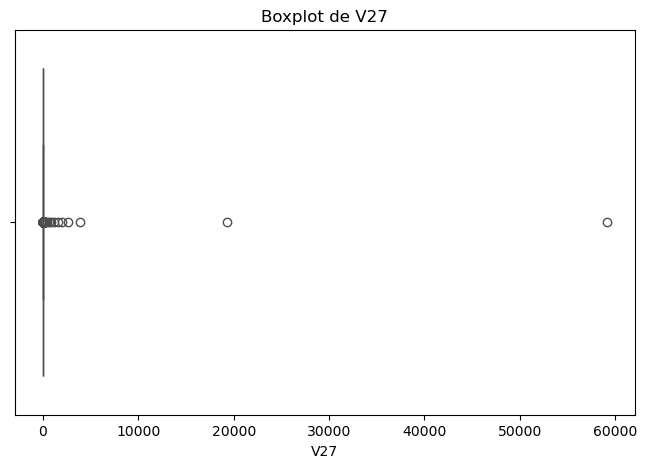

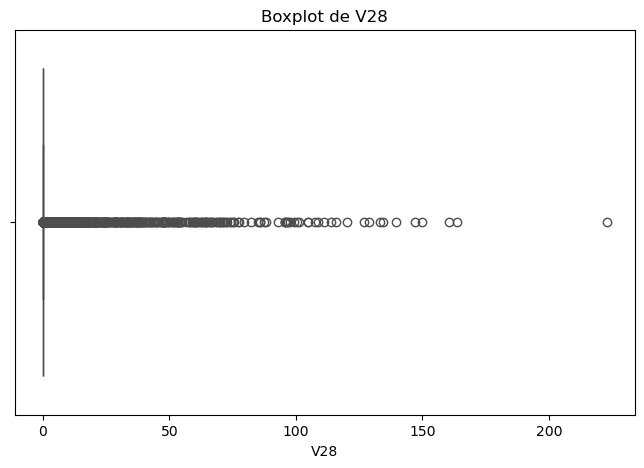

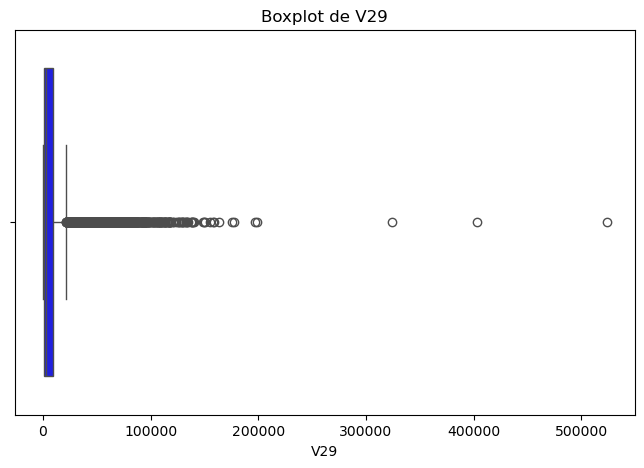

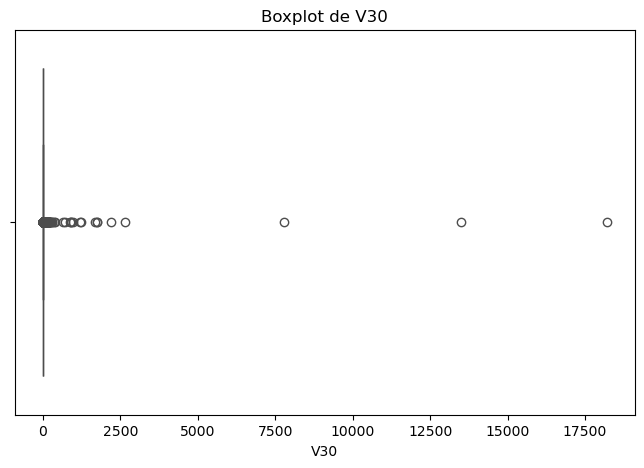

In [66]:
# Crear boxplots y violin plots para todas las columnas numéricas
for col in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_numeric[col], color="blue")
    plt.title(f"Boxplot de {col}")
    plt.show()

### Violin

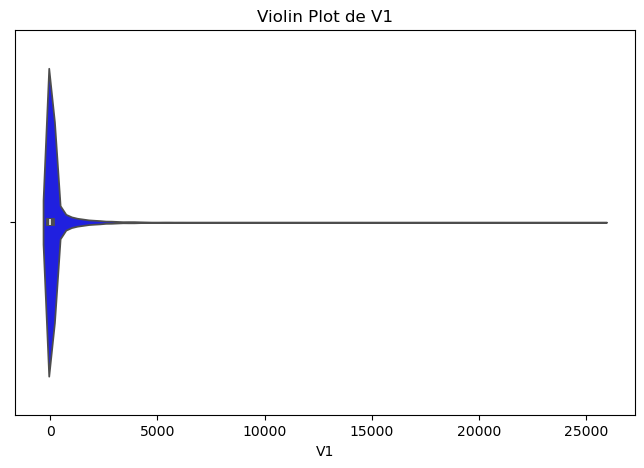

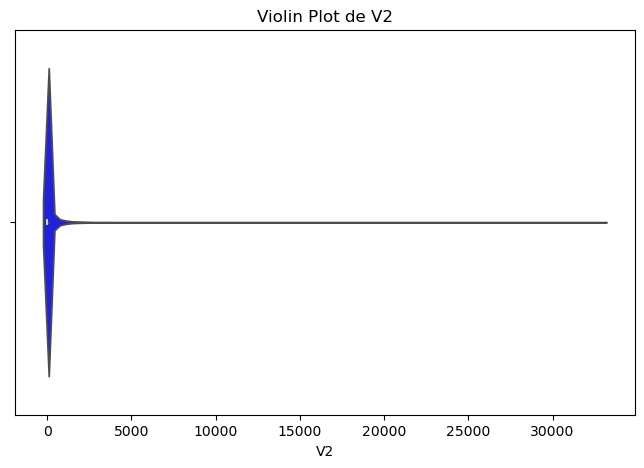

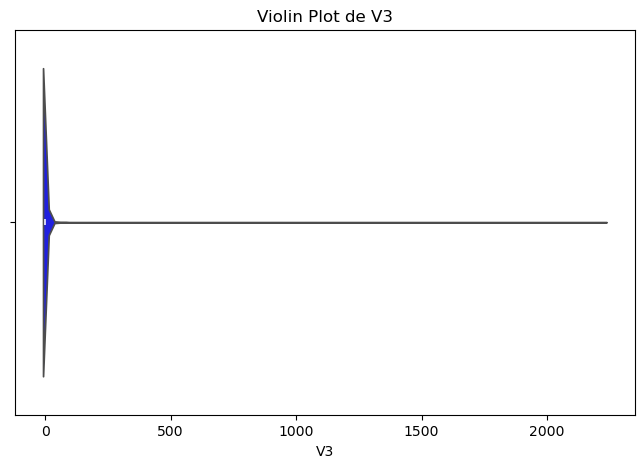

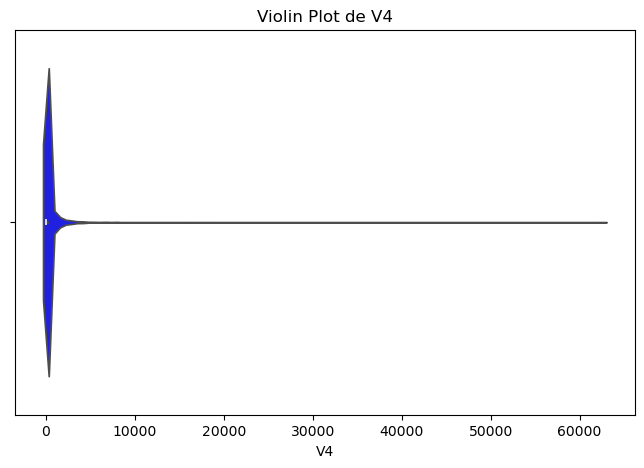

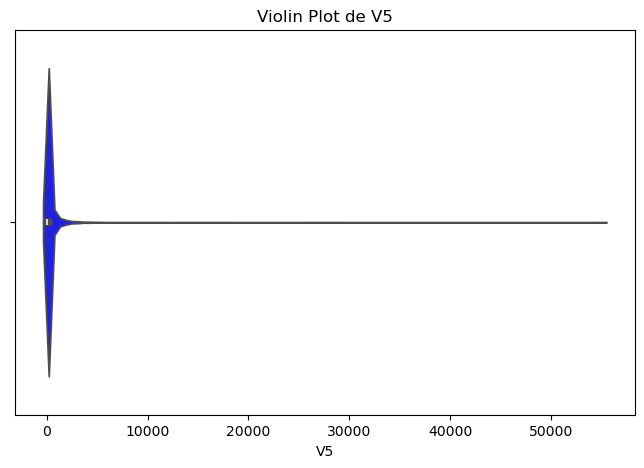

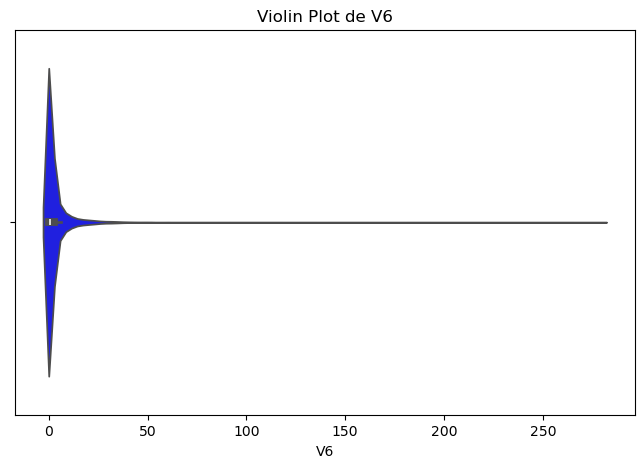

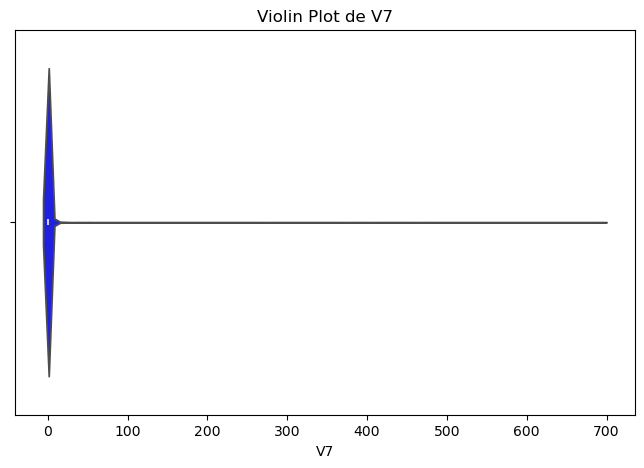

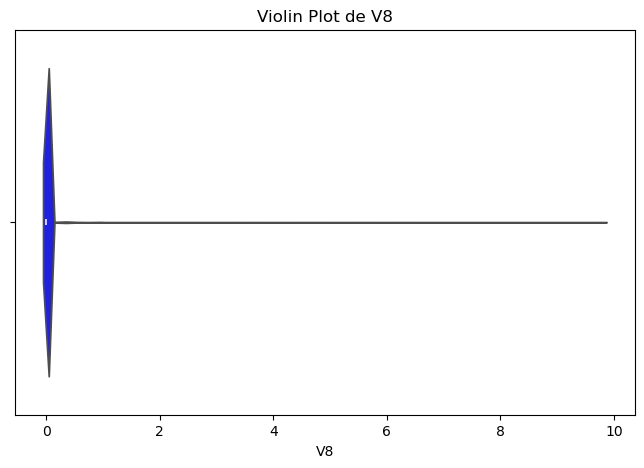

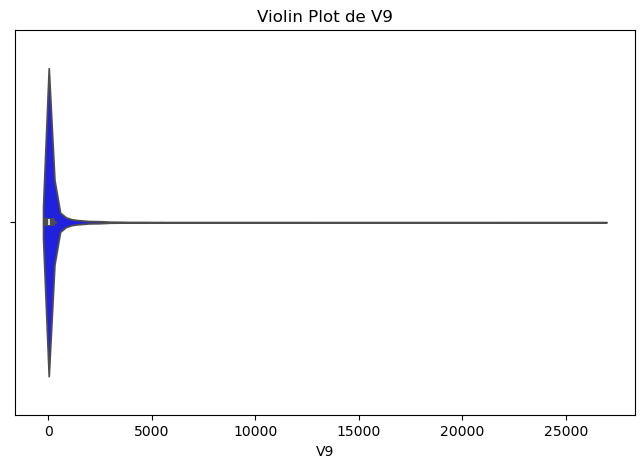

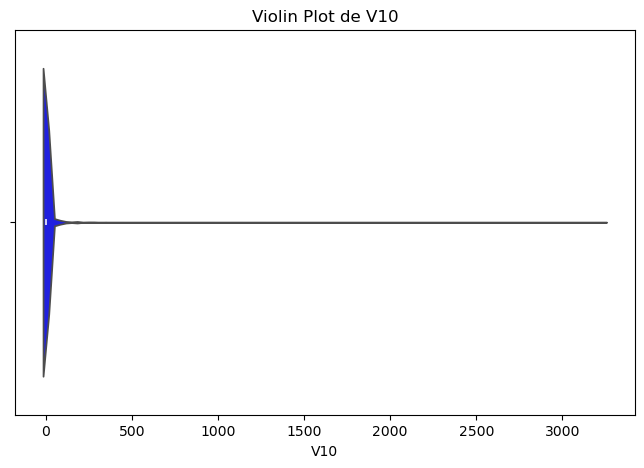

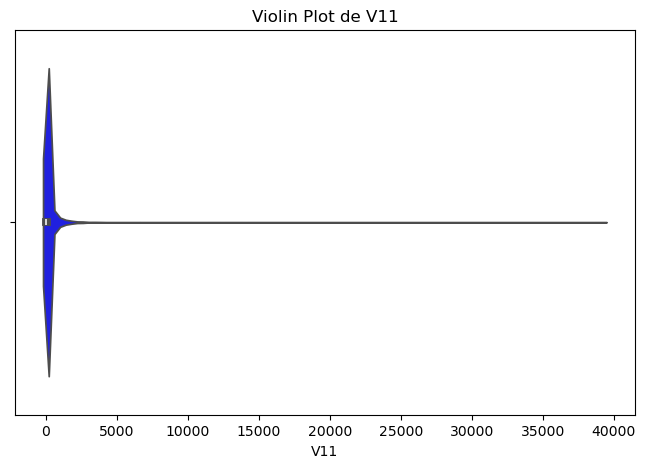

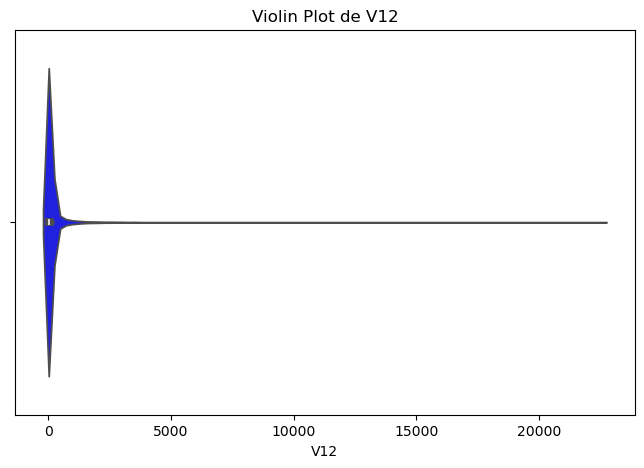

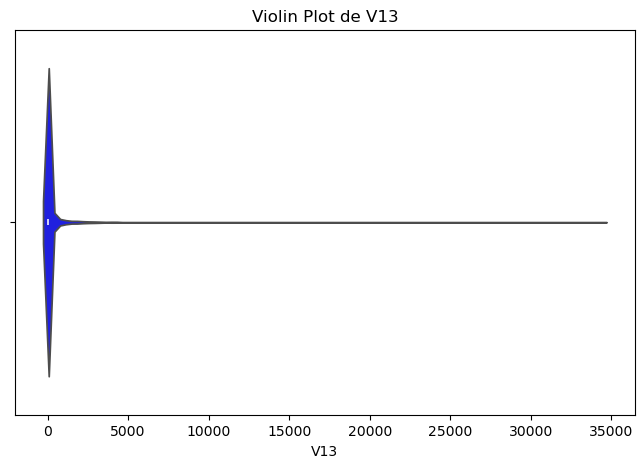

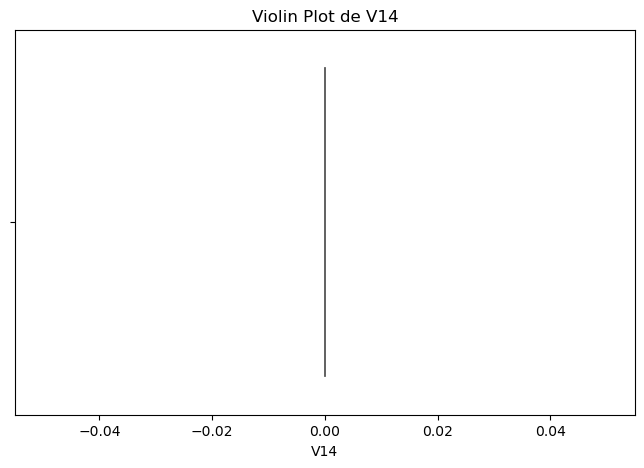

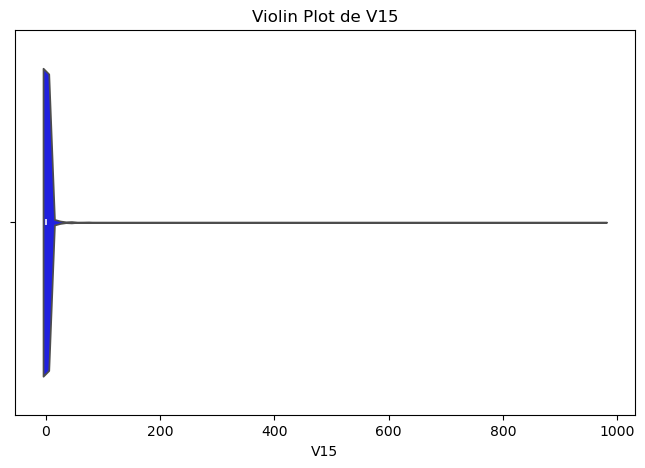

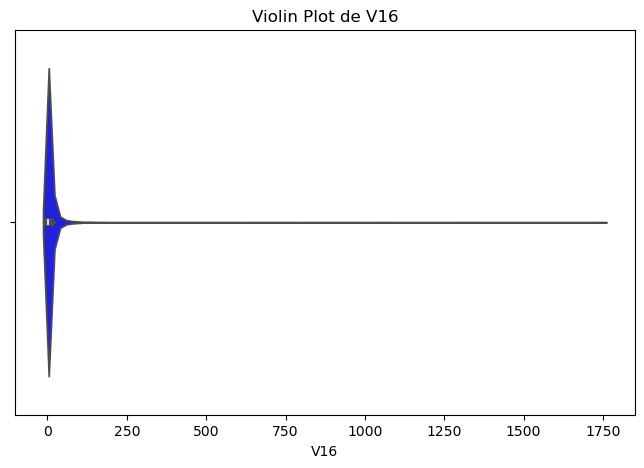

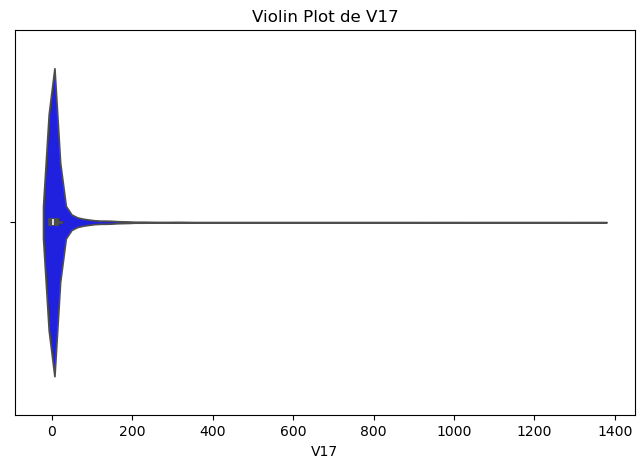

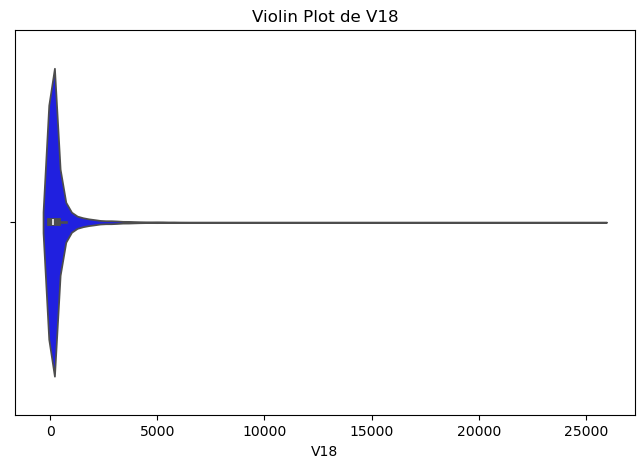

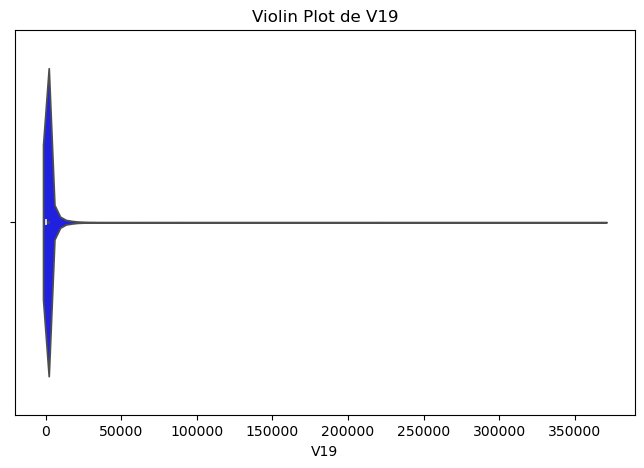

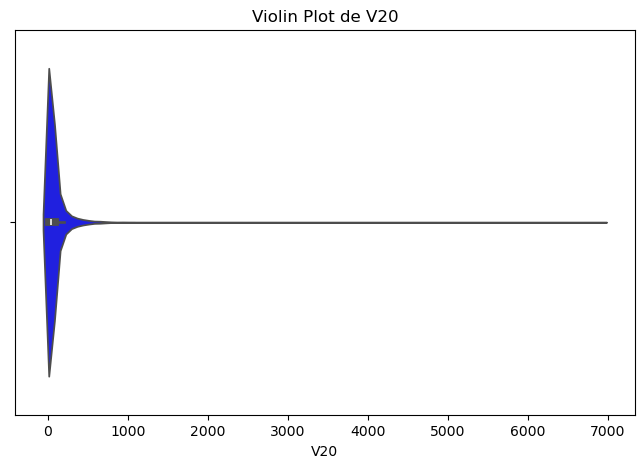

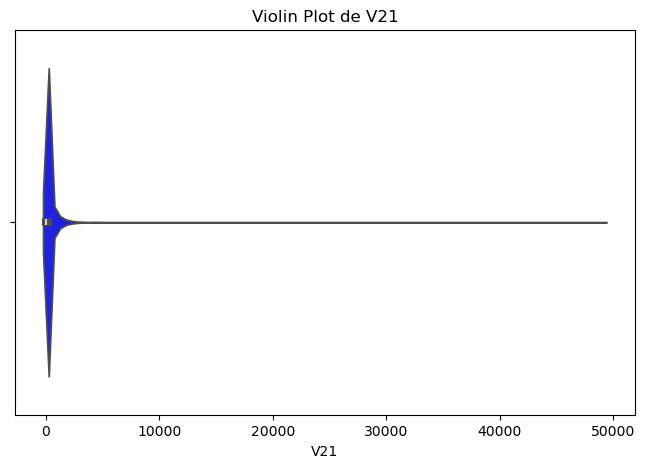

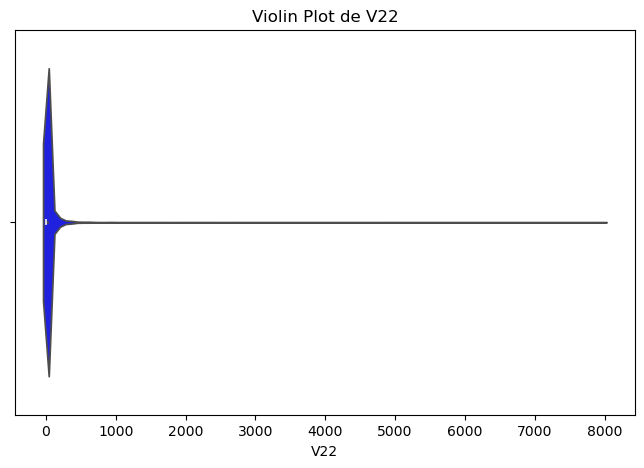

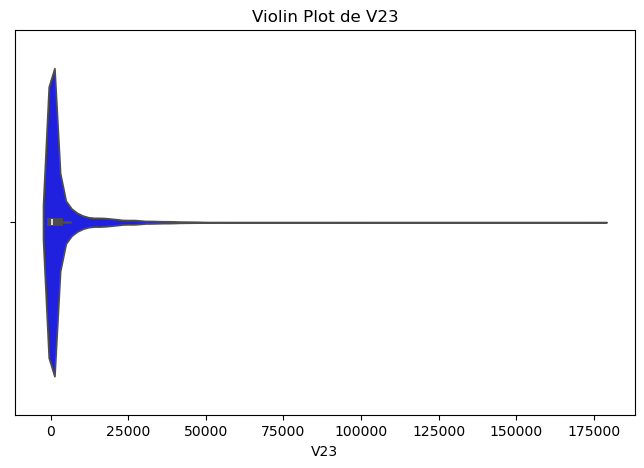

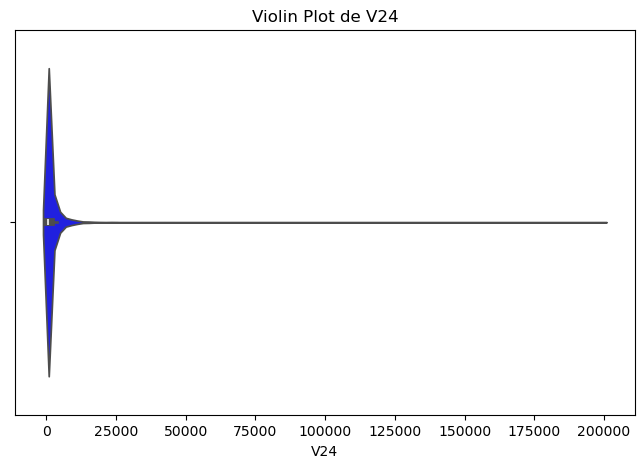

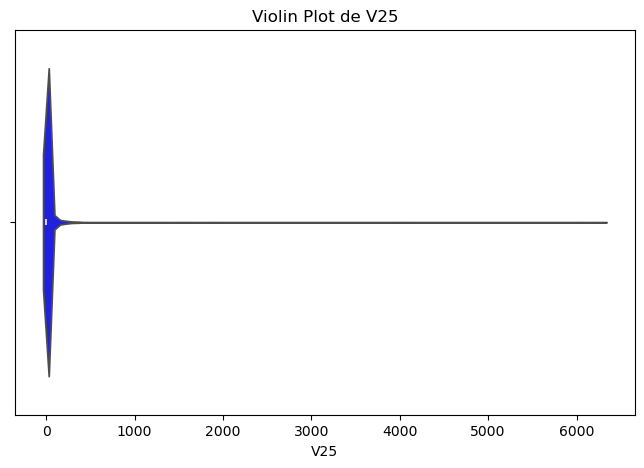

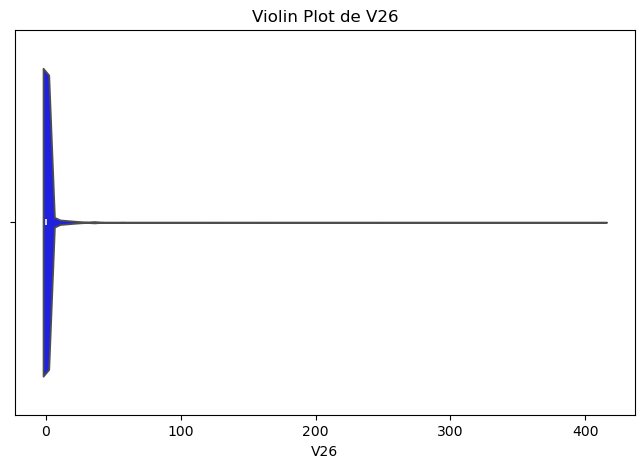

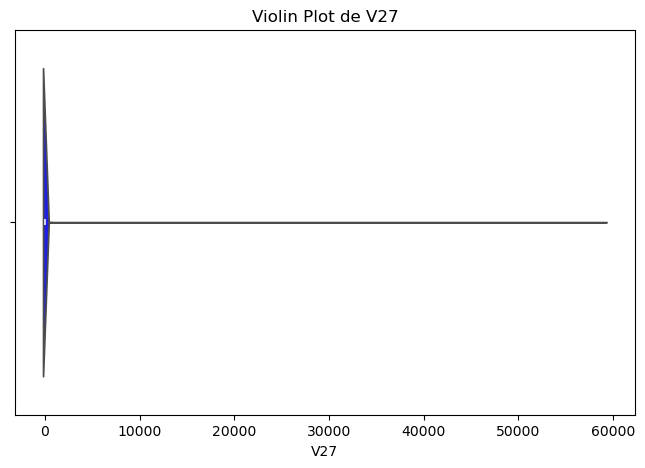

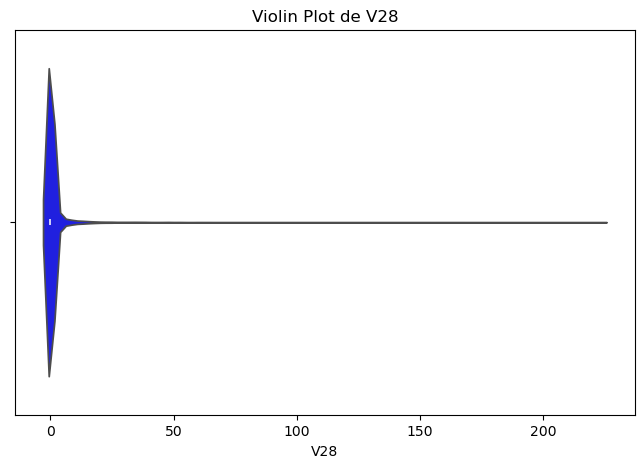

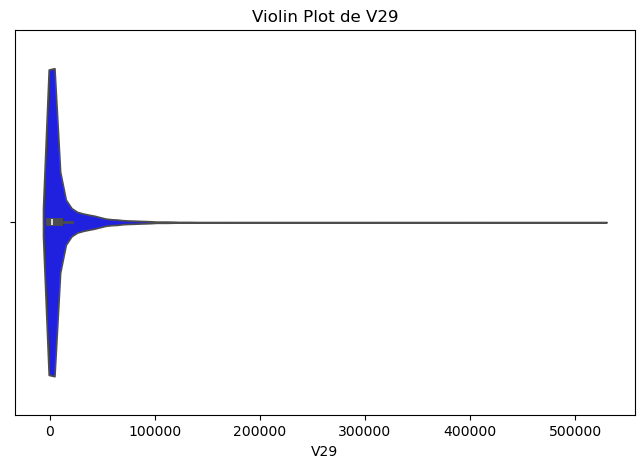

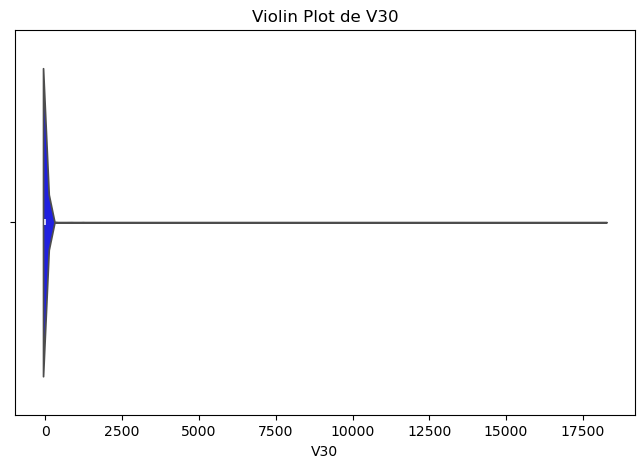

In [67]:
# Crear boxplots y violin plots para todas las columnas numéricas
for col in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=df_numeric[col], color="blue")
    plt.title(f"Violin Plot de {col}")
    plt.show()

### Barras Categoricas

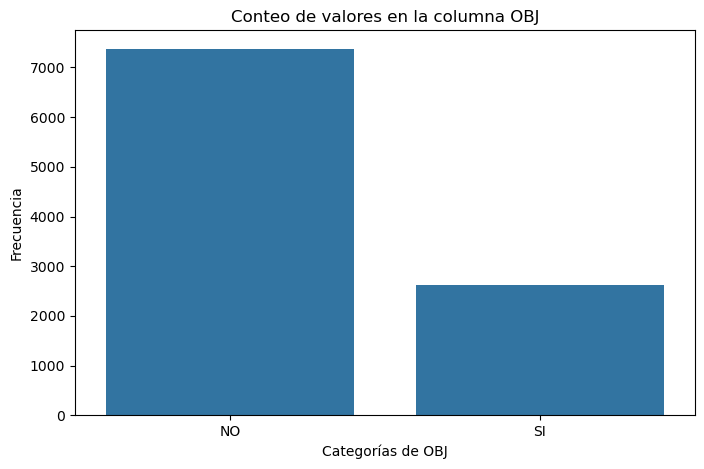

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x=group_1_df["OBJ"])

# Etiquetas y título
plt.xlabel("Categorías de OBJ")
plt.ylabel("Frecuencia")
plt.title("Conteo de valores en la columna OBJ")
plt.show()


### Boxplot Categorías

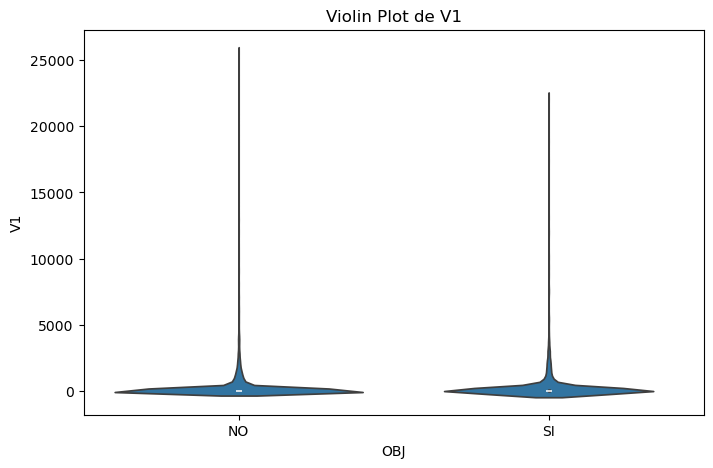

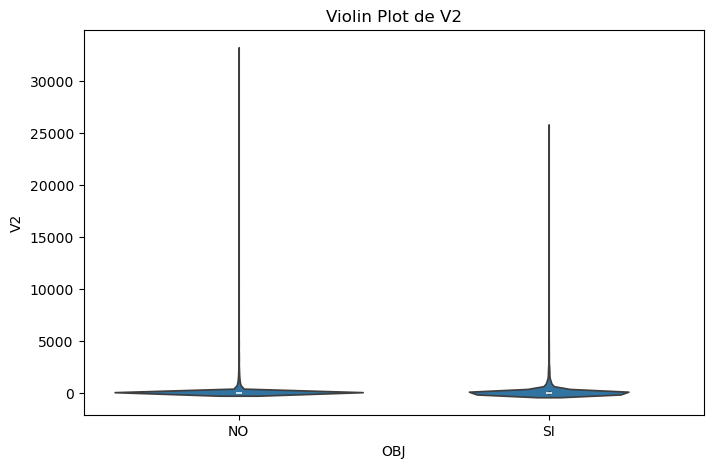

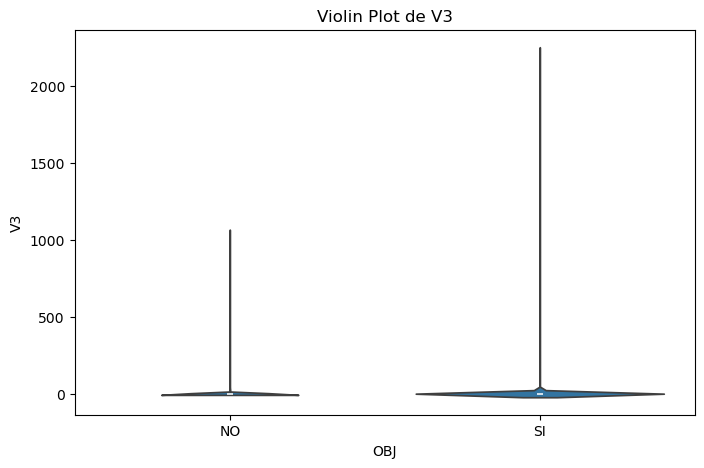

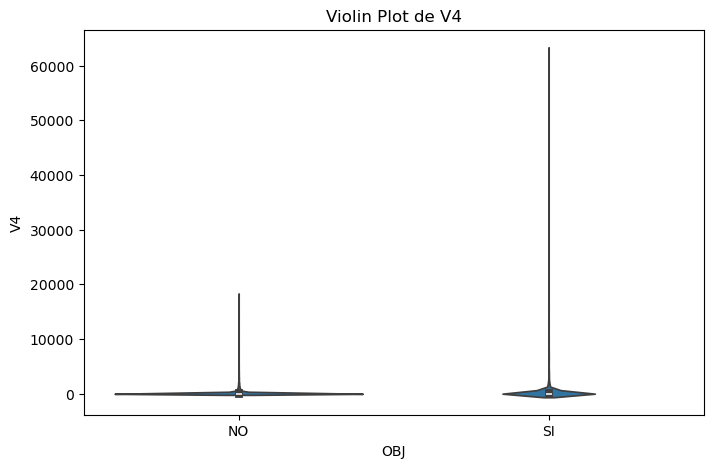

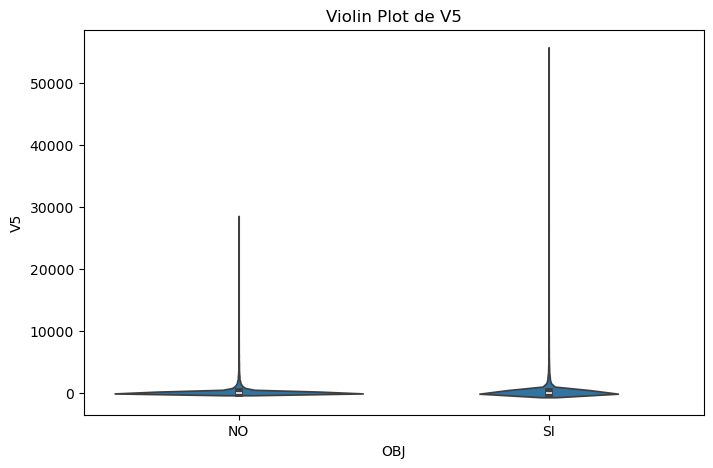

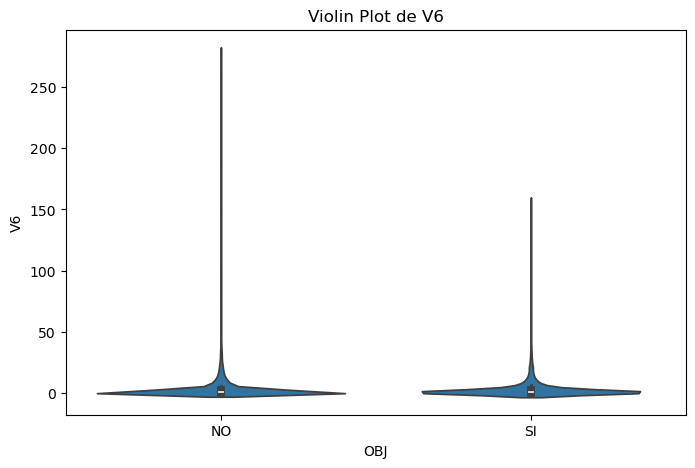

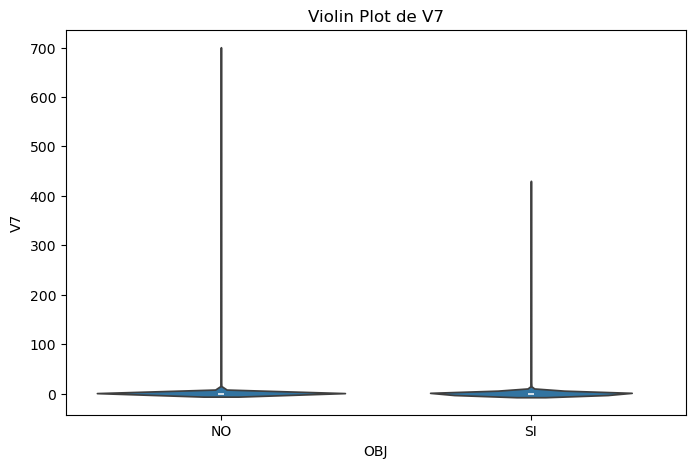

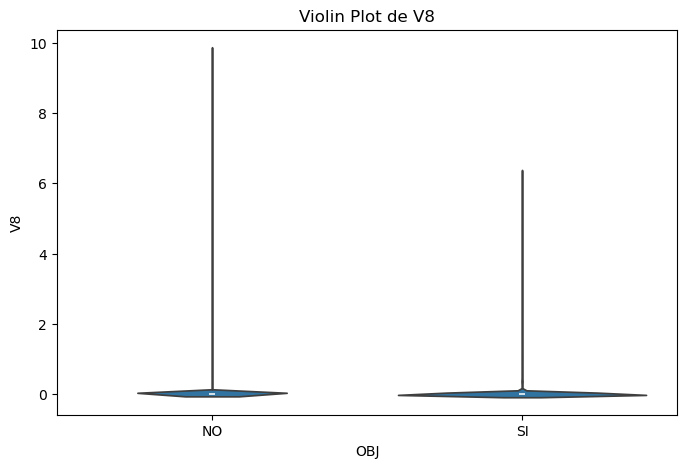

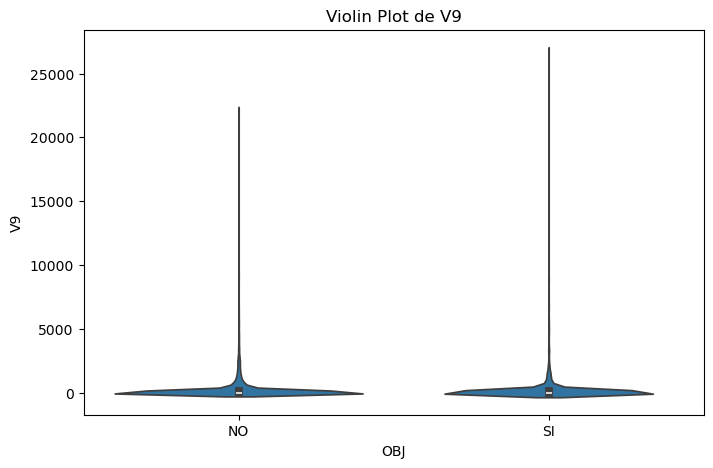

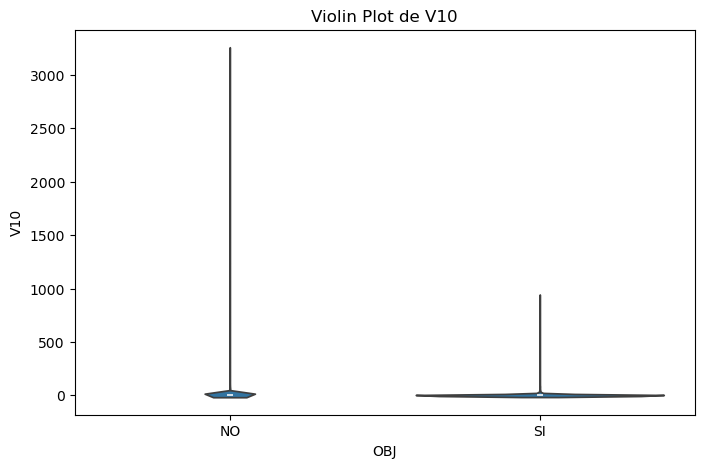

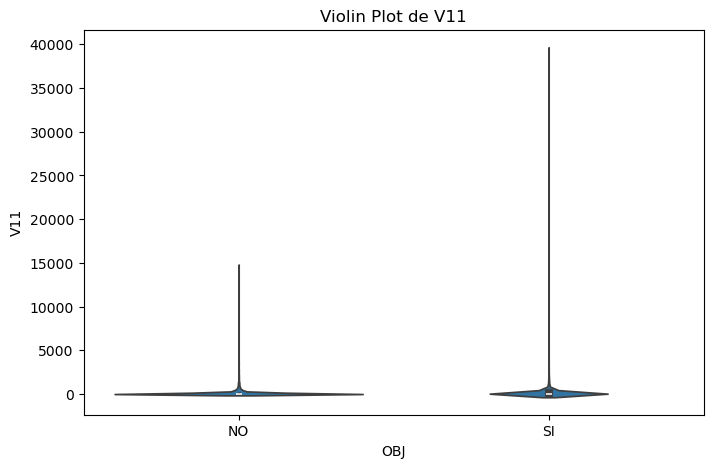

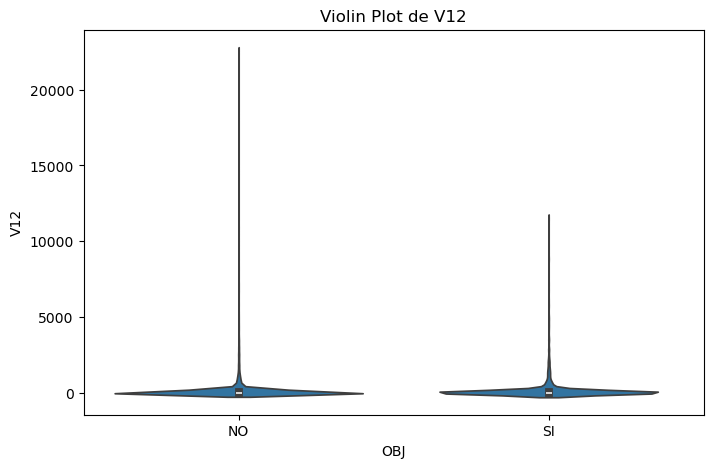

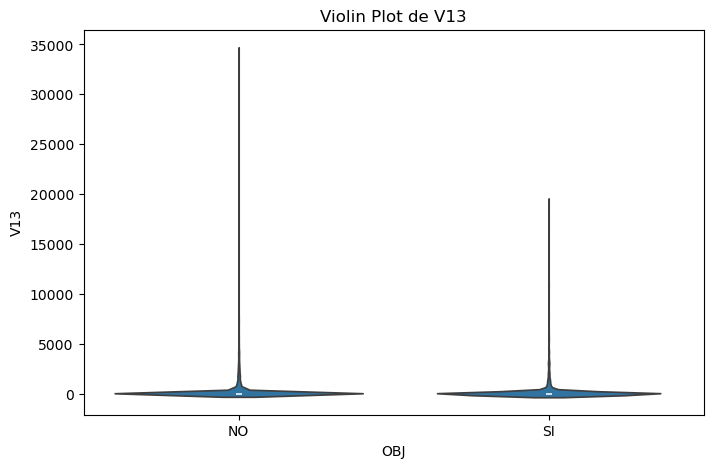

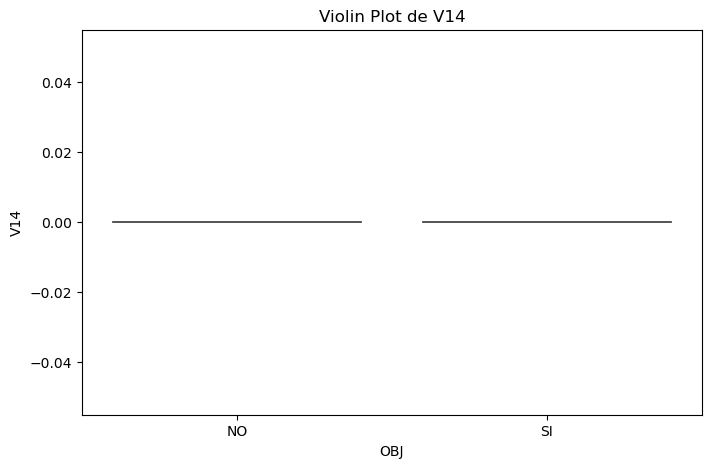

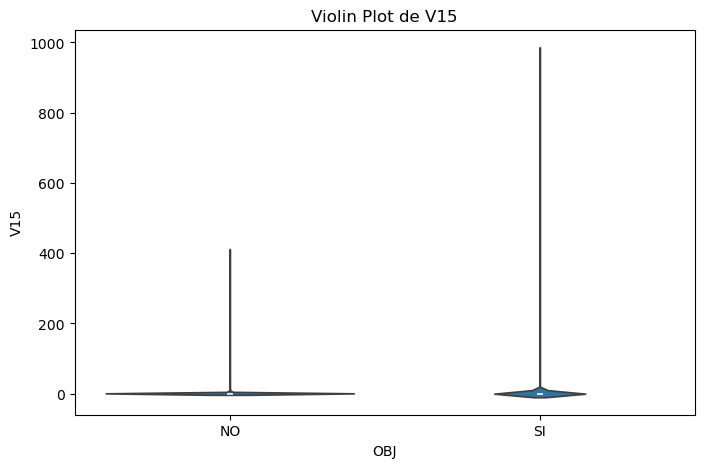

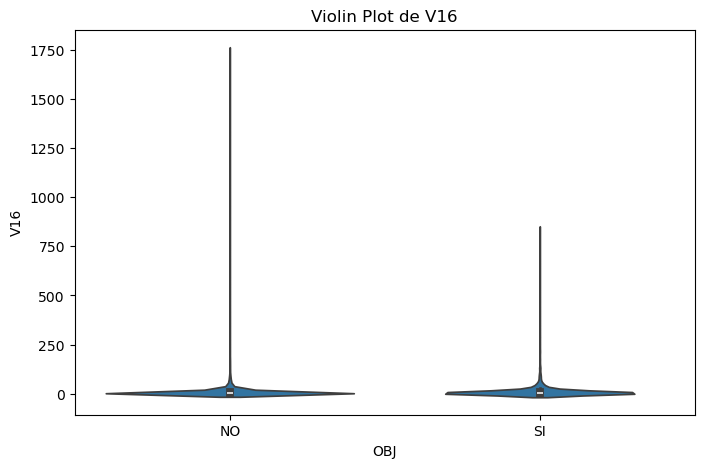

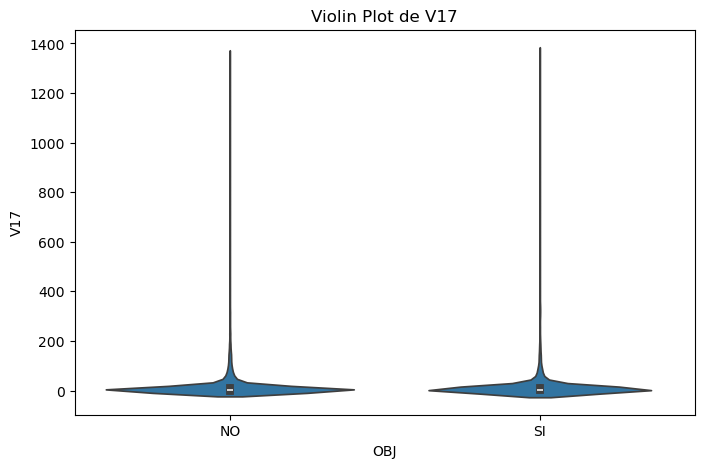

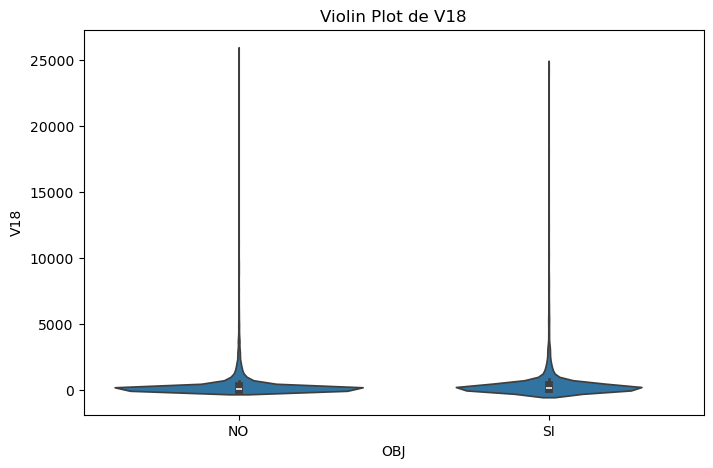

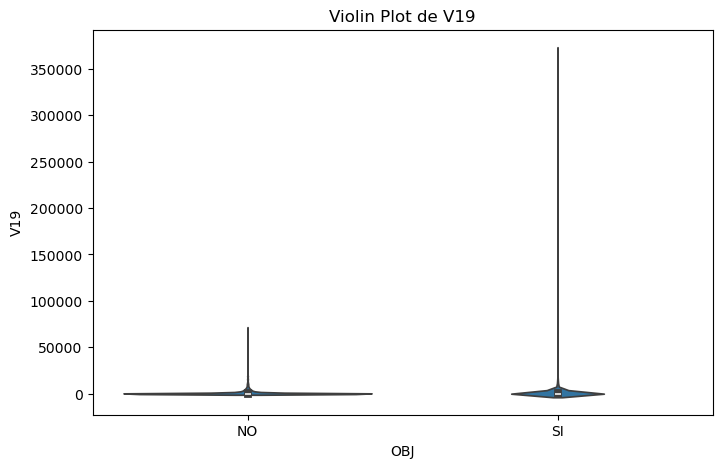

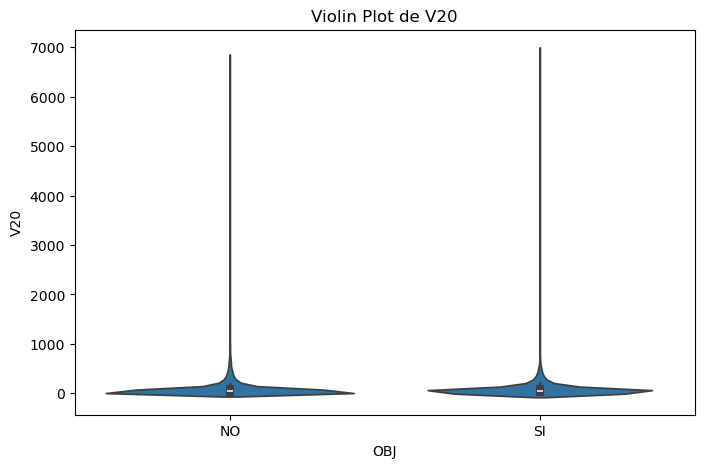

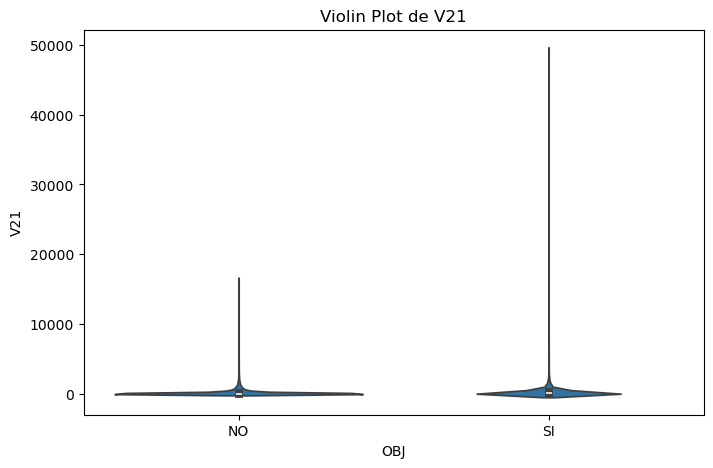

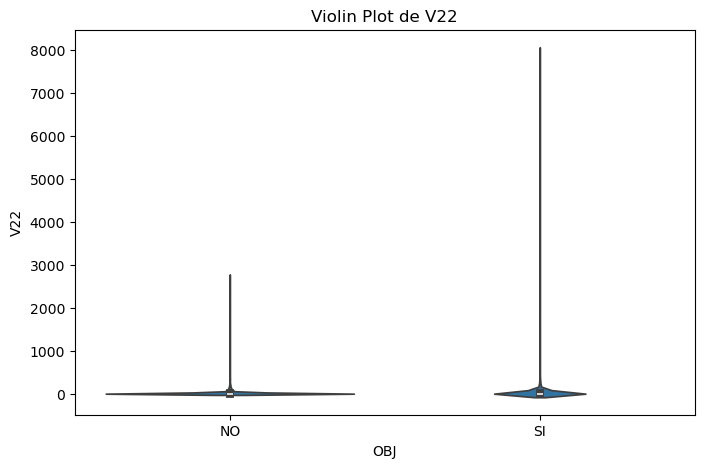

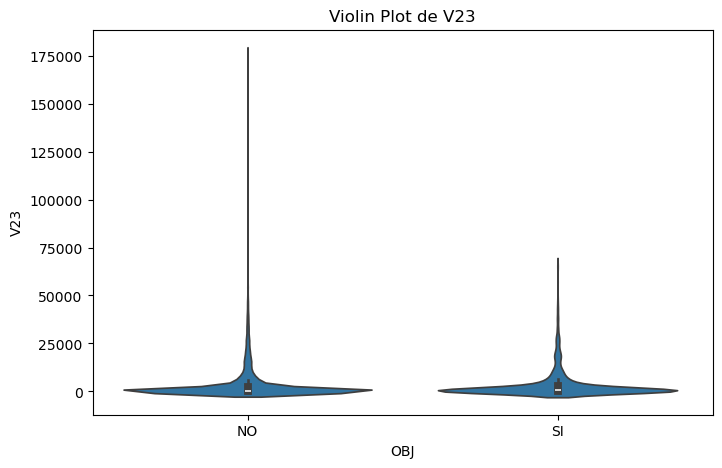

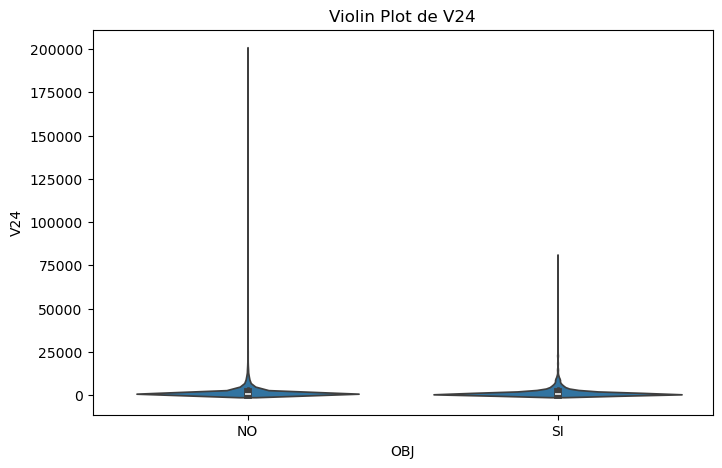

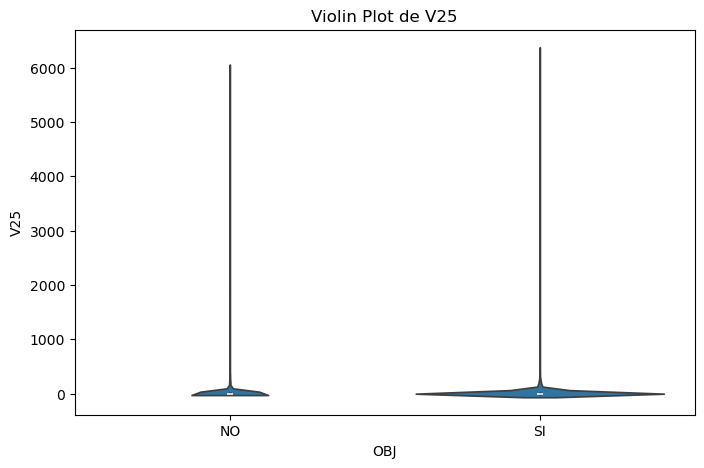

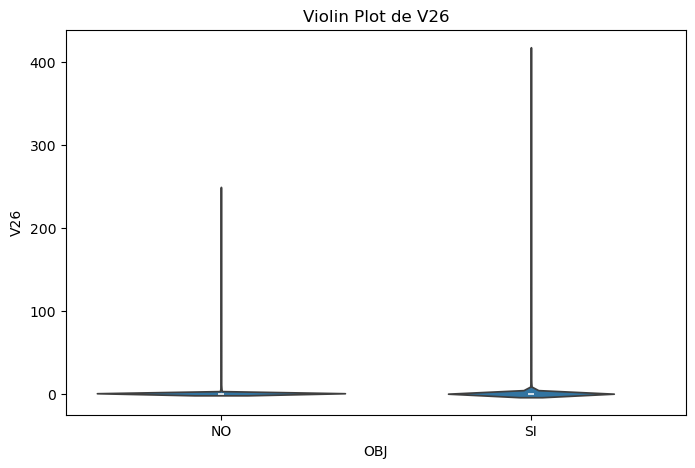

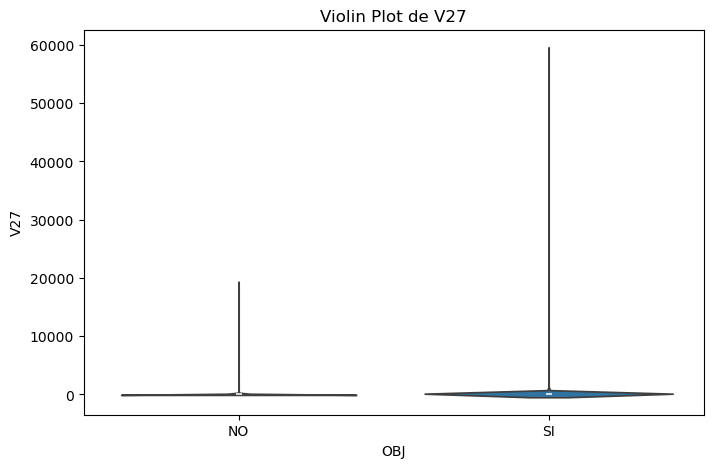

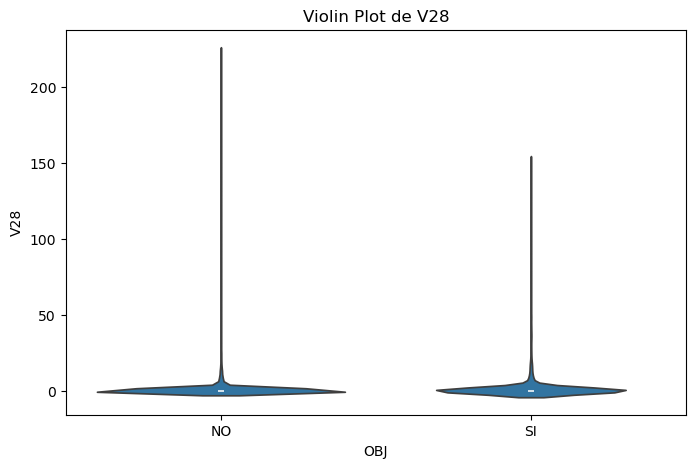

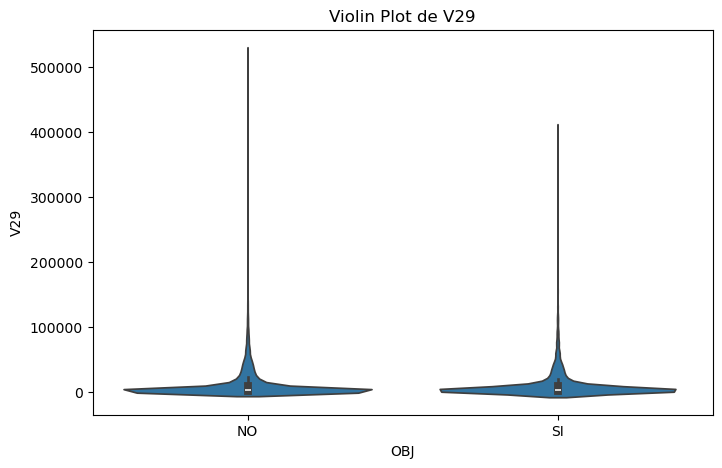

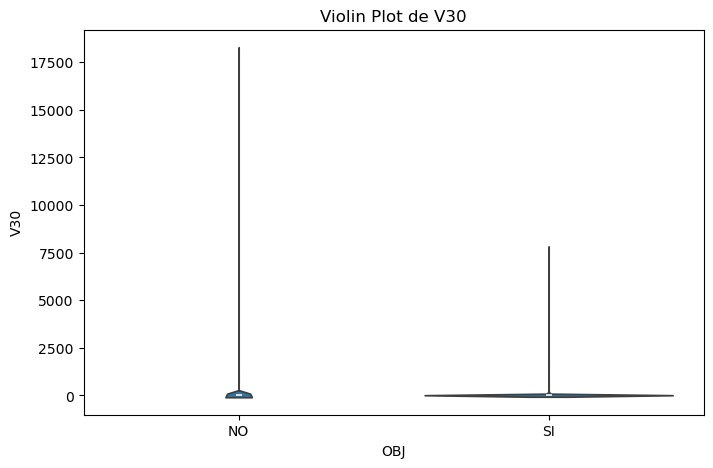

In [70]:
# Crear boxplots y violin plots para todas las columnas numéricas
for col in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=group_1_df['OBJ'], y=df_numeric[col])
    plt.title(f"Violin Plot de {col}")
    plt.show()

## EDA - Multivariable

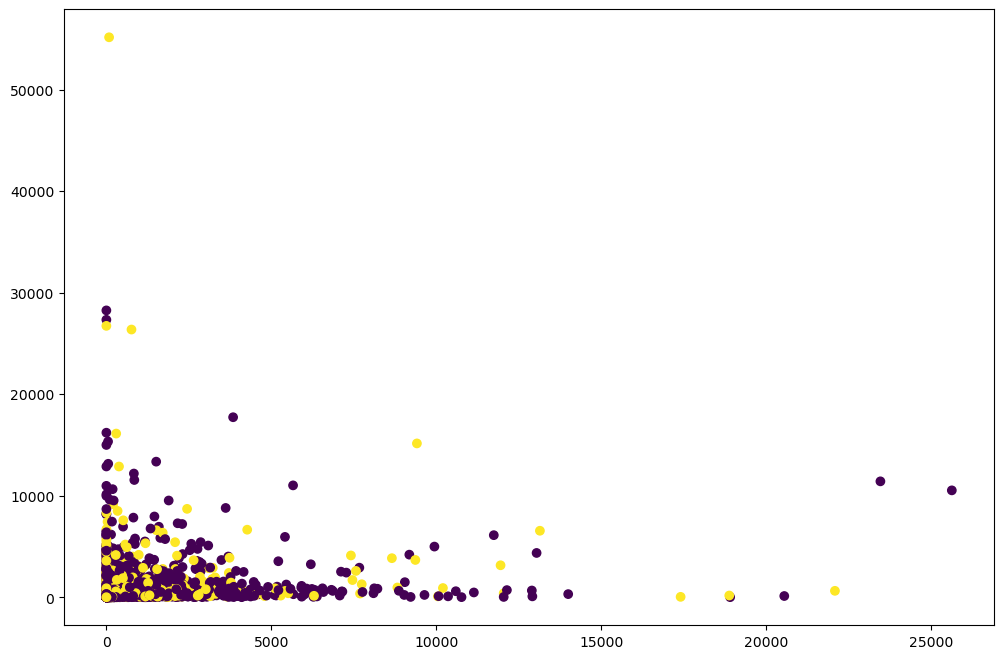

In [99]:
plt.figure(figsize=(12, 8))
y_df = group_1_df["OBJ"].map({"NO": 0, "SI": 1})
plt.scatter(df_numeric["V1"], df_numeric["V5"], c=y_df)
plt.show()

### Correlacion de Variables

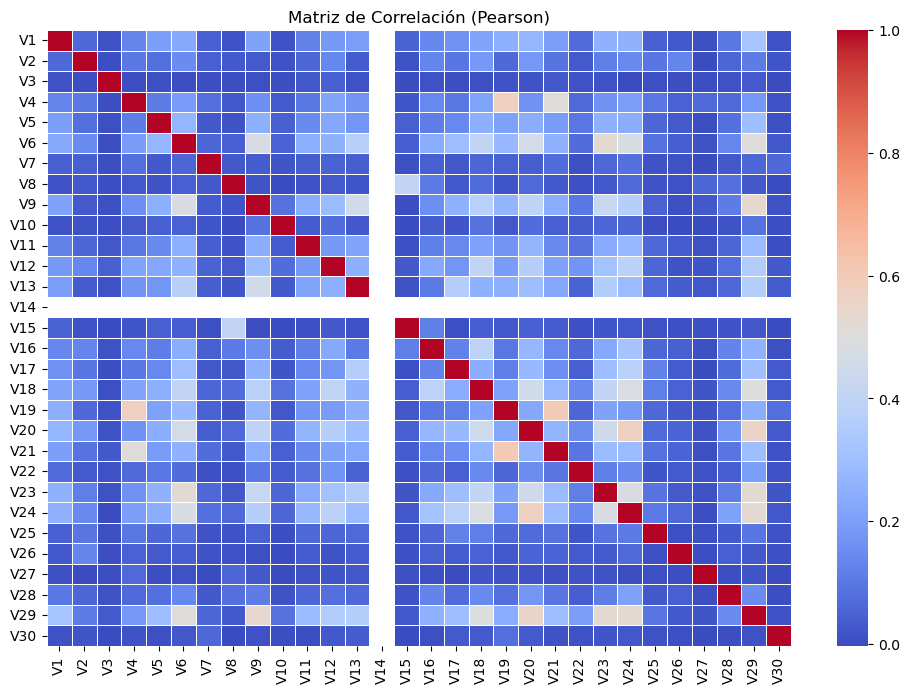

In [72]:
correlation_matrix = df_numeric.corr(method="pearson")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Etiquetas y título
plt.title("Matriz de Correlación (Pearson)")

# Mostrar gráfico
plt.show()

### Seleccion de features mas importantes

Estamos considerando eliminar variables altamente correlacionadas con un threshold mayor a `0.8` si fuera necesario

In [74]:
correlated_features = set()
threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("No tenemos variables altamente correlacionadas", correlated_features)

No tenemos variables altamente correlacionadas set()


## Resumen - EDA
- Vemos que las variables V1 hasta V30 tienen un sesgo a la derecha
- Tienen una dispersión alta y muchos outliers en casi todas las variables numericas
- La distribución y las dimensiones son diferentes, habría que ver la necesidad de normalizar.
- La variable objetivo "OBJ" no está balanceada entonces podemos caer en un sesgo para los valores "NO" a diferencia de "SI"

## Normalizacion

In [105]:
from sklearn.preprocessing import StandardScaler
z_core_scaler = StandardScaler()
X_df = pd.DataFrame(z_core_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
X_df.head()

# eliminando V14 porque varianza = 0
X_df= X_df.drop(columns=["V14"])

y_df = group_1_df["OBJ"].map({"NO": 0, "SI": 1})

## Separacion de Set de Datos

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=0)

## Entrenamiento de Modelos

In [107]:
scores = ('precision', 'recall', 'f1', 'roc_auc', 'accuracy')
score_response = []
confution_matrix_responses = {}

### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Estandariza los datos (importante para KNN)
    ("knn", KNeighborsClassifier())  # Modelo KNN
])

param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 20, 100],  # Número de vecinos
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=10, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'knn',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    
    y_pred = best_model.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['knn'] = cm_knn

print(score_response)


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.p

[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}]


### SVC (Support Vector Machine)

In [111]:
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

param_grid = {'svc__gamma': [0.1, 1, 5, 10], 'svc__kernel': ['rbf']}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=2, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'svc',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['svc'] = cm_svc

print(score_response)


[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.3706

### XGBooster

In [31]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.1 MB/s eta 0:00:0000:010:01


In [112]:

import xgboost as xgb

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalizar datos
    ("xgb", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"))  # Modelo XGBoost
])

param_grid = {
    "xgb__n_estimators": [3, 10],  # Número de árboles
    "xgb__max_depth": [10, 20, 30,],  # Profundidad de los árboles
    "xgb__learning_rate": [ 0.1, 0.2],  # Tasa de aprendizaje
    "xgb__subsample": [0.7, 0.8,],  # Fracción de datos usados en cada iteración
    "xgb__gamma": [0.1, 0.2]  # Regularización para evitar sobreajuste
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=5, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'xg',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['xg'] = cm_svc

print(score_response)


/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.3706

### Decision Tree

In [113]:

from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalizar datos
    ("tree", DecisionTreeClassifier())
])

param_grid = {
    "tree__criterion": ["entropy"],  # Función de impureza
    "tree__max_depth": [3, 5, 10, 30, 50],  # Profundidad máxima del árbol
    "tree__min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "tree__min_samples_leaf": [1, 2, 5],  # Mínimo de muestras en una hoja
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=5, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'tree',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['tree'] = cm_svc

print(score_response)


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.p

[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.36071289821289826}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.17069868062603494}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.21249219534756297}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5846377095996933}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7414666666666667}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.3706

### Confusion Matrix

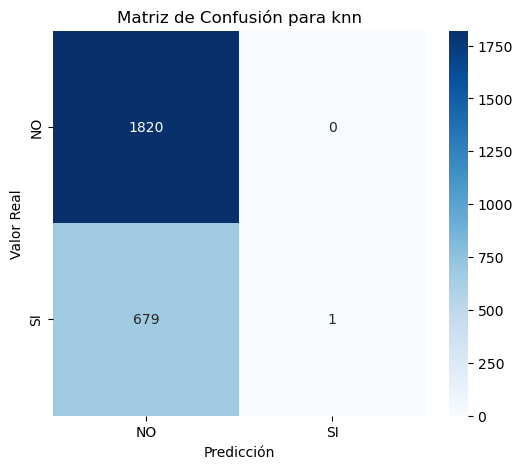

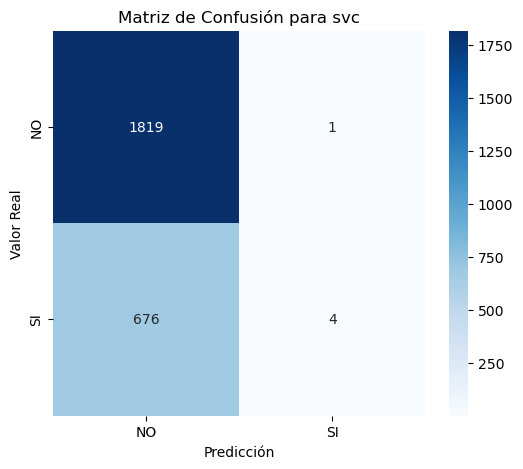

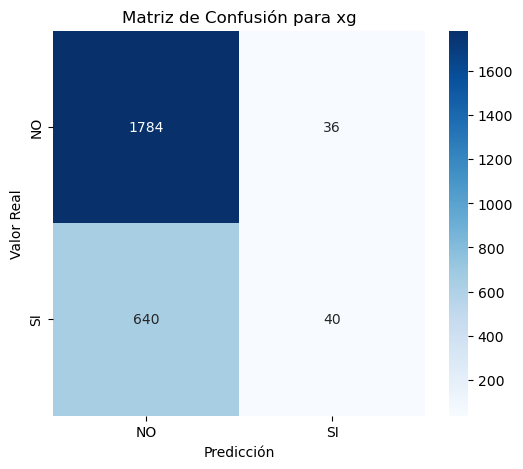

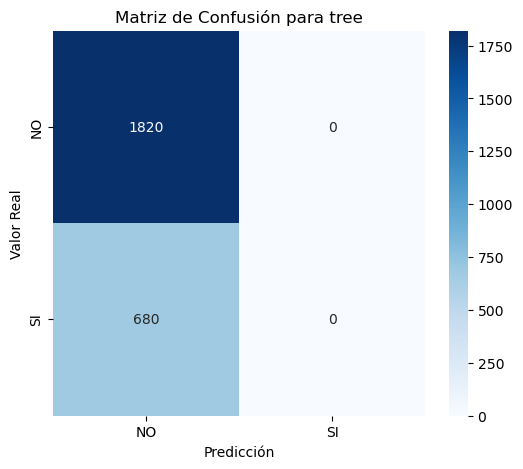

In [114]:
# Visualizar la matriz de confusión
for model, current_matrix in confution_matrix_responses.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(current_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["NO", "SI"], yticklabels=["NO", "SI"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusión para {model}")
    plt.show()

### Best Scores

In [115]:
df_best_score_responses = pd.DataFrame(score_response)
df_best_score_responses.head(80)

,model,score_metric_name,score_metric_value
0,knn,precision,0.360713
1,knn,recall,0.170699
2,knn,f1,0.212492
3,knn,roc_auc,0.584638
4,knn,accuracy,0.741467
5,knn,precision,0.360713
6,knn,recall,0.170699
7,knn,f1,0.212492
8,knn,roc_auc,0.584638
9,knn,accuracy,0.741467


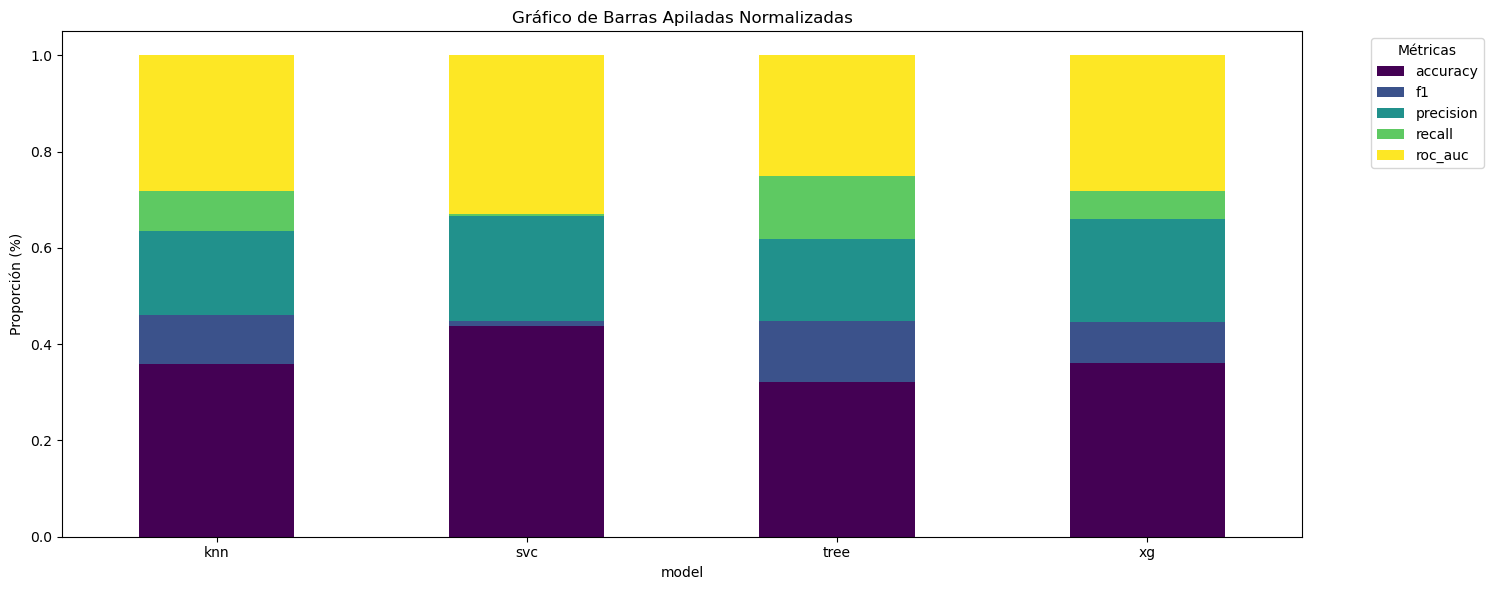

In [116]:
df_pivot = pd.crosstab(df_best_score_responses["model"], df_best_score_responses["score_metric_name"], values=df_best_score_responses["score_metric_value"], aggfunc="sum", normalize="index")
df_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))


handles, labels = ax.get_legend_handles_labels()  # Obtener leyenda actual
plt.ylabel("Proporción (%)")
plt.title("Gráfico de Barras Apiladas Normalizadas")
plt.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Comprobación - Analizando Falsos Negativos

In [117]:
# Errores
errores_FN = X_test[(y_test == 1) & (y_pred == 0)]
errores_FN

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
9394,-0.238979,-0.043012,-0.029886,-0.171204,-0.034056,-0.280724,-0.087481,-0.065263,-0.217975,-0.065816,...,-0.133286,-0.073290,0.138670,-0.041849,-0.093778,-0.077845,-0.01502,-0.179637,1.608691,-0.026138
898,-0.246525,0.454548,-0.033998,-0.151184,-0.230576,-0.318143,-0.087481,-0.065263,-0.292363,-0.065816,...,-0.227185,-0.140044,-0.396416,-0.405359,-0.094024,-0.077845,-0.01502,-0.178299,-0.432214,-0.026435
5506,-0.246525,-0.100008,-0.033998,-0.024491,-0.235651,-0.329270,-0.087481,-0.065263,-0.288703,-0.065816,...,-0.248813,-0.115593,-0.342511,-0.413391,-0.093879,-0.077845,-0.01502,-0.179637,-0.457334,-0.026435
3497,-0.246525,-0.157514,-0.033979,0.595896,-0.204580,-0.329351,-0.087481,-0.065263,-0.287038,-0.065312,...,-0.208524,-0.109921,-0.414023,-0.336207,-0.093923,-0.077845,-0.01502,-0.179637,-0.219674,-0.026435
2308,-0.246525,-0.157998,0.051727,-0.143366,-0.226641,-0.348367,-0.087481,-0.065263,-0.274296,-0.065816,...,-0.082962,-0.139187,-0.386524,-0.393903,-0.093780,-0.077845,-0.01502,-0.179637,-0.393245,-0.026435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,-0.239380,-0.157796,-0.033998,-0.172342,-0.215584,1.015984,-0.087481,-0.065263,-0.228555,-0.065816,...,-0.134143,-0.126961,-0.141847,-0.108959,-0.088643,-0.077845,-0.01502,-0.178917,-0.385770,-0.026435
7514,-0.226920,-0.014276,-0.033998,-0.030033,-0.196197,-0.287905,-0.087481,-0.065263,-0.231809,-0.065816,...,-0.019921,-0.136094,0.118972,-0.241818,-0.094024,-0.077845,-0.01502,-0.179637,-0.267016,-0.026435
1267,-0.246525,-0.157998,-0.033998,-0.172615,-0.236822,-0.351891,-0.087481,-0.065263,-0.293521,-0.065816,...,-0.265020,-0.140868,-0.431729,-0.433475,-0.094024,-0.077845,-0.01502,-0.179637,-0.498614,-0.026435
2041,0.832742,-0.157794,-0.033998,-0.169079,-0.190518,-0.016427,-0.087481,-0.065263,0.157478,-0.065816,...,-0.003281,2.338037,0.539766,0.386697,0.175821,-0.077845,-0.01502,-0.179637,-0.217803,-0.026435


In [125]:
# Aciertos
aciertos_df = X_test[(y_test == 0) & (y_pred == 0)]
aciertos_df

y_test.value_counts()

OBJ
0    1820
1     680
Name: count, dtype: int64

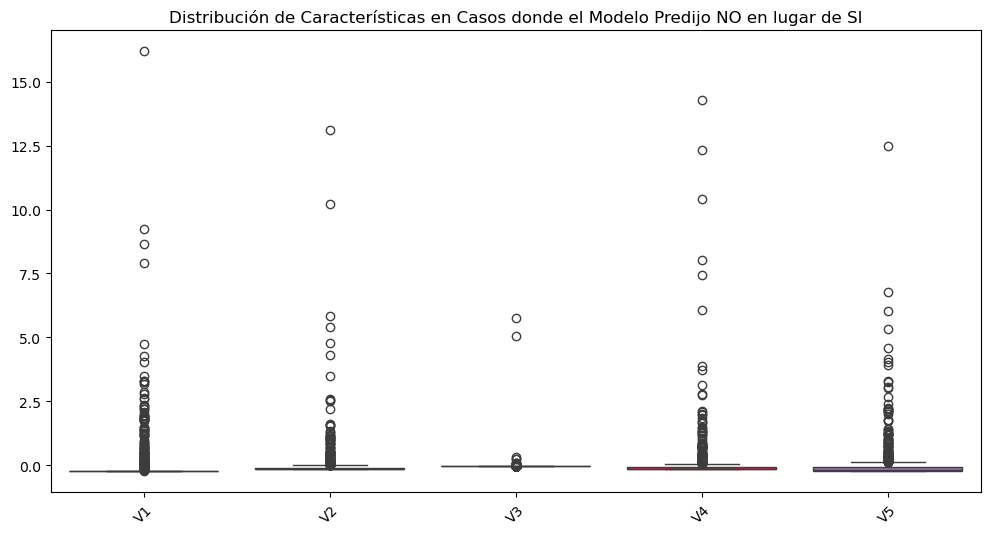

In [ ]:
cols_interes = ["V1", "V2", "V3", "V4", "V5"]
# 🔹 Crear gráfico comparativo de características en errores
plt.figure(figsize=(12, 6))
sns.boxplot(data=errores_FN[cols_interes])
plt.title("Distribución de Características en Casos donde el Modelo es Verdadero Positivo")
plt.show()